<h1 align= "center"> Final Project </h1>

### Machine Learning and Neural Networks

 #### Project Idea 1: Deep learning on a public dataset Template

### Choosing a measure of success

<div class="alert alert-block alert-info">
Let's see how dataset is distributed to select the most suitable measure of success.
</div>

In [57]:
# importing the necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colorama import Fore, Back, Style

In [58]:
# The code below is written by me

In [59]:
def getMetaDataset(path):
    '''
    Returns a dataframe containing the dataset obtained from the path
    
    parameters: 
    path: path of the csv file containing the dataset
    
    output: 
    metaDataset: Dataframe containing the dataset
    
    '''
    csvDataset = pd.read_csv(path)
    return csvDataset

In [60]:
# Store paths of both meta deta datasets in an array
pathsOfMetaData = ['./HAM10000Updated/HAM10000_metadata.csv', 
                   './HAM10000Updated/ISIC2018_Task3_Test_GroundTruth.csv']

# get data from first meta deta file
skinMetaData1 = getMetaDataset(pathsOfMetaData[0])
# get data from second meta deta file
skinMetaData2 = getMetaDataset(pathsOfMetaData[1])

In [61]:
# print summary of first meta deta
print(skinMetaData1.info(),'\n')

# print summary of second meta deta
print(skinMetaData2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     1512 non-null   object 
 1   image_id      1512 non-null   object 
 2   dx            1512 non-null   object 
 3   dx_type       1512 non-null   object 
 4   age           1230 non-null   fl

In [62]:
# Merge both datasets on top of each other
HAM10000MetaData = pd.concat([skinMetaData1, skinMetaData2], axis=0)

In [63]:
def getClassDist(labelsCol):
    '''
    Print the class distribution in a column
    
    parameters: takes the column of dataframe
    
    output: print statements indicating how different classes are distributed in the column
    '''  
    
    # Get total number of unique classes
    totUniqueClasses = len(np.unique(labelsCol))
    
    # Get total samples      
    totSamples = len(labelsCol)
    
    # print total samples and classes. Also add color to print statements    
    print(Style.BRIGHT)
    print(Fore.RED  + 'Total Samples: ',totSamples,'\n')
    print(Fore.BLUE  + 'Total Classes: ',totUniqueClasses,'\n')
    
    # store instances of each unique class
    allUniqueLabels, occurances = np.unique(labelsCol, return_counts=True)
    
    # print instances of each class    
    for i in range(len(allUniqueLabels)):
        print(Fore.GREEN + allUniqueLabels[i],":",occurances[i])


In [64]:
# function to print class distribution
getClassDist(HAM10000MetaData['dx'])


Total Samples:  11527 

Total Classes:  7 

akiec : 370
bcc : 607
bkl : 1316
df : 159
mel : 1284
nv : 7614
vasc : 177


<div class="alert alert-block alert-success">
We can see from above output that the classes are imablancely distributed with the least frequent class being 'akiec' that has 327 samples whilst the most frequent class 'nv' ha  7614 instances. Accuracy is not the suitable for this dataset.

So can chose any of two approaches: 
Approach 1: Either do undersampling and oversampling to reduce imbalanacement and use accuracy
Approach 2: Using a more suitable metric for imbalanced dataset such as precision, recall or f1-score.    

We'll follow approach 1
</div>

### Deciding on evaludation Protocol

In [65]:
# function to print class distribution
getClassDist(HAM10000MetaData['dx'])


Total Samples:  11527 

Total Classes:  7 

akiec : 370
bcc : 607
bkl : 1316
df : 159
mel : 1284
nv : 7614
vasc : 177


In [66]:
# The code written by me ends here.

<div class="alert alert-block alert-success">
We notice we have a total of 11,527  which shows which is considerably fine amount of data(not ideal) for hold-out validation. K-Fold and Stratified Validation might also be used and could potentially turn out to be better but since they will require more computational power and time we will opt for hold-out validation 
</div>

### Preparing the data

<div class="alert alert-block alert-info">
In this section we'll be preparing the data to be used in our model. It's important to prepare the data before feeding it into a nueral network to get the best possible results. 
</div>

### Keeping required columns

In [67]:
# The code below is written by me

In [68]:
# print the HAM10000MetaData info
HAM10000MetaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11527 entries, 0 to 1511
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     11527 non-null  object 
 1   image_id      11527 non-null  object 
 2   dx            11527 non-null  object 
 3   dx_type       11527 non-null  object 
 4   age           11188 non-null  float64
 5   sex           11526 non-null  object 
 6   localization  11526 non-null  object 
 7   dataset       11526 non-null  object 
dtypes: float64(1), object(7)
memory usage: 810.5+ KB


<div class="alert alert-block alert-info">
We will only require columns 'image id', 'age', 'sex', 'localization' for our task so we'll remove all else</div>

In [69]:
# array to store column names to keep
requiredColumns = ['image_id', 'age', 'sex', 'localization', 'dx', 'dx_type']

# only storing columns we need 
HAM10000MetaData = HAM10000MetaData[requiredColumns].copy()

In [70]:
# print first 5 records of metadata
HAM10000MetaData.head(5)

,image_id,age,sex,localization,dx,dx_type
0,ISIC_0027419,80.0,male,scalp,bkl,histo
1,ISIC_0025030,80.0,male,scalp,bkl,histo
2,ISIC_0026769,80.0,male,scalp,bkl,histo
3,ISIC_0025661,80.0,male,scalp,bkl,histo
4,ISIC_0031633,75.0,male,ear,bkl,histo


<div class="alert alert-block alert-success">
The output above shows there is no column named 'dataset' which means we've succefully kept only the required columns</div>

### Renaming the Columns

<div class="alert alert-block alert-info">
Next, we'll rename our columns to ensure more readability</div>

In [71]:
# print first 2 records of metadata
HAM10000MetaData.head(2)

,image_id,age,sex,localization,dx,dx_type
0,ISIC_0027419,80.0,male,scalp,bkl,histo
1,ISIC_0025030,80.0,male,scalp,bkl,histo


In [72]:
# The code i wrote ends here

# Code is taken from internet and adapted to my use

In [73]:
# renaming each column with new name
HAM10000MetaData = HAM10000MetaData.rename(columns = {'image_id': 'Image ID', 
                                                      'localization' : 'Location',
                                                      'age': 'Age', 'sex': 'Sex', 'dx': 'Label',
                                                      'dx_type': 'Label Type'})
# display 5 random records
HAM10000MetaData.sample(5)

,Image ID,Age,Sex,Location,Label,Label Type
3219,ISIC_0028682,25.0,female,trunk,nv,follow_up
2011,ISIC_0030192,70.0,male,abdomen,mel,histo
5446,ISIC_0026450,35.0,male,abdomen,nv,follow_up
1467,ISIC_0036020,45.0,female,back,nv,histo
5705,ISIC_0031341,40.0,male,lower extremity,nv,follow_up


<div class="alert alert-block alert-success">
The columns are successfuly renamed
</div>

### Removing Null Value

<div class="alert alert-block alert-info">
Furhtermore, let's look for null values in our dataset
</div>

In [74]:
# display number of null values in each column of dataset
HAM10000MetaData.isna().sum()

Image ID        0
Age           339
Sex             1
Location        1
Label           0
Label Type      0
dtype: int64

<div class="alert alert-block alert-info">
We see missing values are present in 339 records of 'Age' column, while 'Sex' and 'Localization' column have 1 each. Since Localization and Sex column have only 1 missing value we'll remove that record. The Age column has significant number of missing values so we'll using mean of age column to fill these missing values
</div>

In [75]:
# Get length of HAM10000MetaData Dataset
len(HAM10000MetaData)

11527

In [76]:
# drop the records with null values in Location column
HAM10000MetaData.dropna(subset=['Location'], inplace=True)

# drop the records with null values in Sex column
HAM10000MetaData.dropna(subset=['Sex'], inplace=True)

# Replace null values in age column with mean of the age values
HAM10000MetaData['Age'].fillna(HAM10000MetaData['Age'].mean(), inplace=True)

# #reset the index to 0.
HAM10000MetaData = HAM10000MetaData.reset_index(drop=True)

In [77]:
# Get length of metadata
len(HAM10000MetaData)

11526

In [78]:
# get number of null values
HAM10000MetaData.isna().sum()

Image ID      0
Age           0
Sex           0
Location      0
Label         0
Label Type    0
dtype: int64

<div class="alert alert-block alert-success">
The output above shows we have succcessfully removed all the null values in our meta deta dataset
</div>

### Distribution in different columns

<div class="alert alert-block alert-info">
Next, lets print how data is distributed in different column. We'll use print statements and visualization to see how data is fistributed. Furthermore we will categorizethe data using label encoding.
</div>

In [79]:
# The code below is written by me.

In [80]:
# Dictionary to store color codes 
printColor = {
    'red' : 31,
    'yellow' : 33,
    'blue' : 34,
    'purple': 35,
    'sky blue': 36
    
}

def printDistribution(column, colorCode):
    '''
    Dislays a print statement showing instance of each category in a column
    
    parameters: 
    column: the column whose value counts are to be diplsayed
    colorCode: defines the color of the print statement
    
    output: 
    metaDataset: Dataframe containing the dataset
    
    '''
    colInstances = column.value_counts()
    print("\033[1;{}mBefore numberical: \n{}".format(colorCode, colInstances))

In [81]:
def visualizeDistribtution(column, visTitle = '', pieTextSize = 'medium', figSize = [8,6],
                           onlyBarChart= False):
    '''
    Draws visualizations such as bar chart and piechart of how different classes are distributed in a column
    
    parameters: 
    column: the column whose distribution is to be checked
    visTitle(optional): the title for visualization 
    pieTextSize(optional): the size of text on the pie chart
    onlyBarChart(optional): if false, both pie chart and bar chart a displayed. If true only bar chart is
    displayed
    figSize(optional): the size of total output consisting single/both visualizations

    
    output: 
    Bar Chart and Pie Chart(optional) that shows how data is distributed in a column
    
    '''
    
    labelsName = np.unique(column)
    labelsCount = column.value_counts()
    barWidth = 0.7
    
    
    if onlyBarChart == True:
        fig, ax = plt.subplots(1, 1, figsize=(figSize[0], figSize[1])) 
        ax.bar(labelsName, labelsCount, align='center', alpha=0.5, edgecolor ='black', 
               color=['green', 'red', 'black'], width = barWidth)  
        ax.set(ylabel = 'occurances', title=visTitle)
    else:
        fig, ax = plt.subplots(1, 2, figsize=(figSize[0], figSize[1])) 

        ax[0].bar(labelsName, labelsCount, align='center', alpha=0.5, edgecolor ='black', 
                  color=['green', 'red', 'black'], width = barWidth)  
        ax[0].set(ylabel = 'occurances', title=visTitle)
        
        ax[1].pie(labelsCount, labels=labelsName, autopct='%1.1f%%', textprops={'size': pieTextSize})
        ax[1].set(title=visTitle + ' in %')

Before numberical: 
Sex
male       6061
female     5114
unknown     351
Name: count, dtype: int64


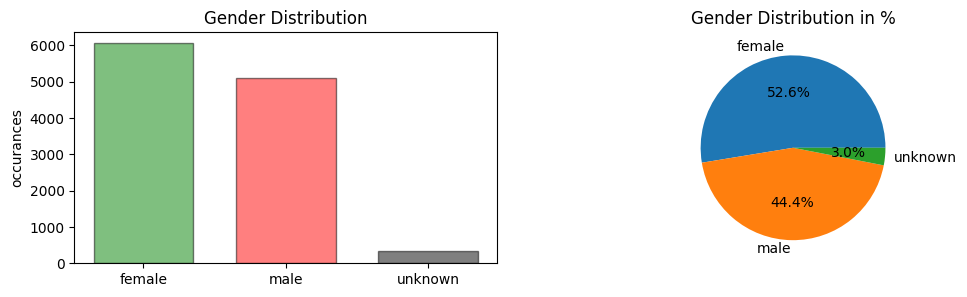

In [82]:
# set the figure size
figSize = [12,3]

# function to print distribution in text
printDistribution(HAM10000MetaData["Sex"], printColor['blue'])
# function to show distribution using visualization
visualizeDistribtution(HAM10000MetaData["Sex"], 'Gender Distribution', 'medium', figSize)

Before numberical: 
Label Type
histo        6126
follow_up    4162
consensus    1162
confocal       76
Name: count, dtype: int64


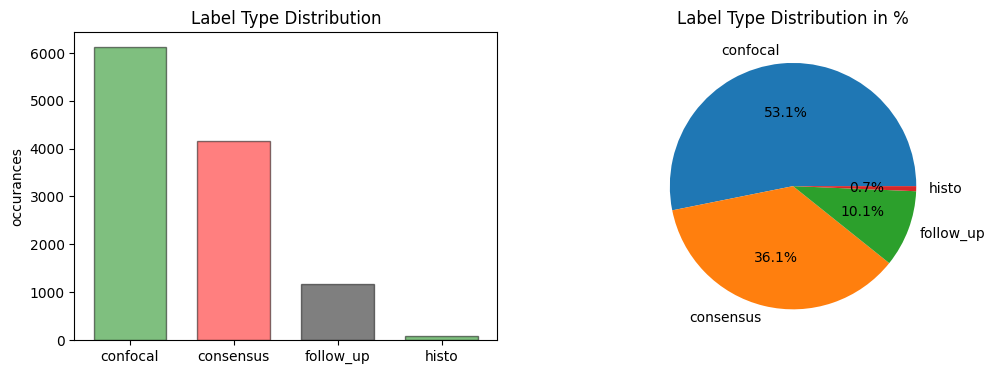

In [83]:
# set the figure size
figSize = [12,4]

# function to print distribution in text
printDistribution(HAM10000MetaData["Label Type"], printColor['red'])

# function to show distribution using visualization
visualizeDistribtution(HAM10000MetaData["Label Type"], 'Label Type Distribution', 'medium', figSize)

Before numberical: 
Location
back               2470
lower extremity    2314
trunk              1555
upper extremity    1257
abdomen            1141
face                839
unknown             568
chest               454
foot                367
neck                195
scalp               140
hand                102
ear                  64
genital              53
acral                 7
Name: count, dtype: int64


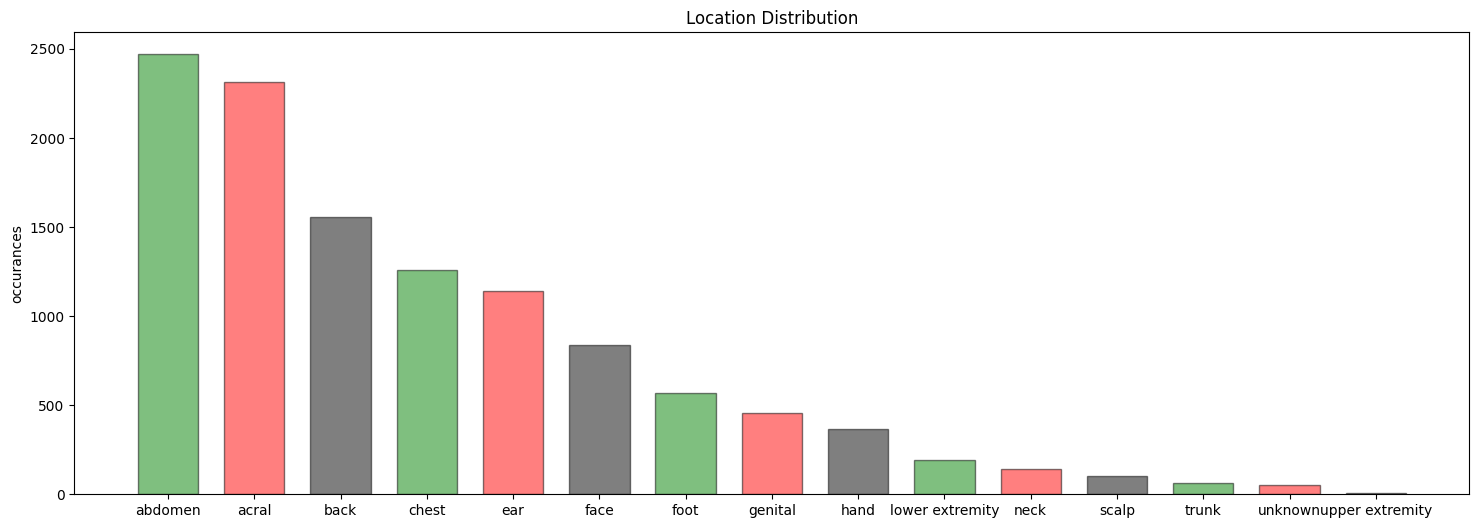

In [84]:
# function to print distribution in text
printDistribution(HAM10000MetaData["Location"], printColor['purple'])

# set the figure size
figSize = [18,6]
# set to true if only bar chart is needed
onlyBarChart = True

# function to show distribution using visualization
visualizeDistribtution(HAM10000MetaData["Location"], 'Location Distribution', 'small', figSize, onlyBarChart)

Before numberical: 
Label
nv       7613
bkl      1316
mel      1284
bcc       607
akiec     370
vasc      177
df        159
Name: count, dtype: int64


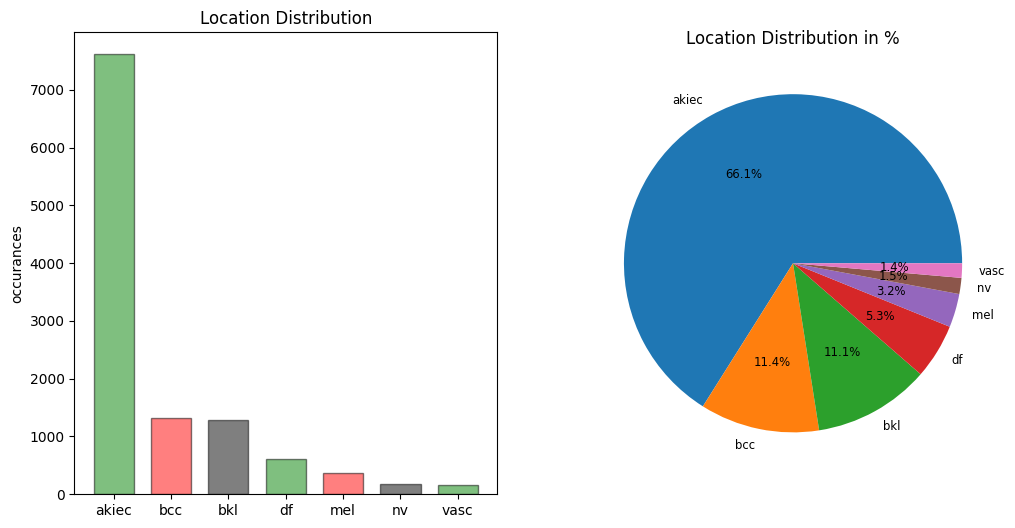

In [85]:
# function to print distribution in text
printDistribution(HAM10000MetaData["Label"], printColor['purple'])

# set the figure size
figSize = [12,6]

# function to show distribution using visualization
visualizeDistribtution(HAM10000MetaData["Label"], 'Location Distribution', 'small', figSize)

In [86]:
import matplotlib.pyplot as plt

def visualizeAgeDistribtution(column, visTitle1 = '', visTitle2 = '', vis2Sub = ['',''], figSize = [8,6]):
    '''
    Draws visualizations such as box plot and and histogram to show hoe data is distributed in numerical
    columns.
    
    parameters: 
    column: the numerical column whose distribution is to be checked
    visTitle1(optional): the title for box plot 
    visTitle1(optional): the title for histogram 
    figSize(optional): the size of total output consisting both visualizations

    output: 
    Box Plot and Histogram that shows how data is distributed in a numerical column
    
    '''
    
    
    fig, ax = plt.subplots(1, 2, figsize=(figSize[0], figSize[1])) 

    
    ax[0].boxplot(column, vert = 0)
    ax[0].set(title=visTitle1)
    
    ax[1].hist(column, color='purple') 
    ax[1].set(title=visTitle2, ylabel = vis2Sub[1], xlabel = vis2Sub[0])


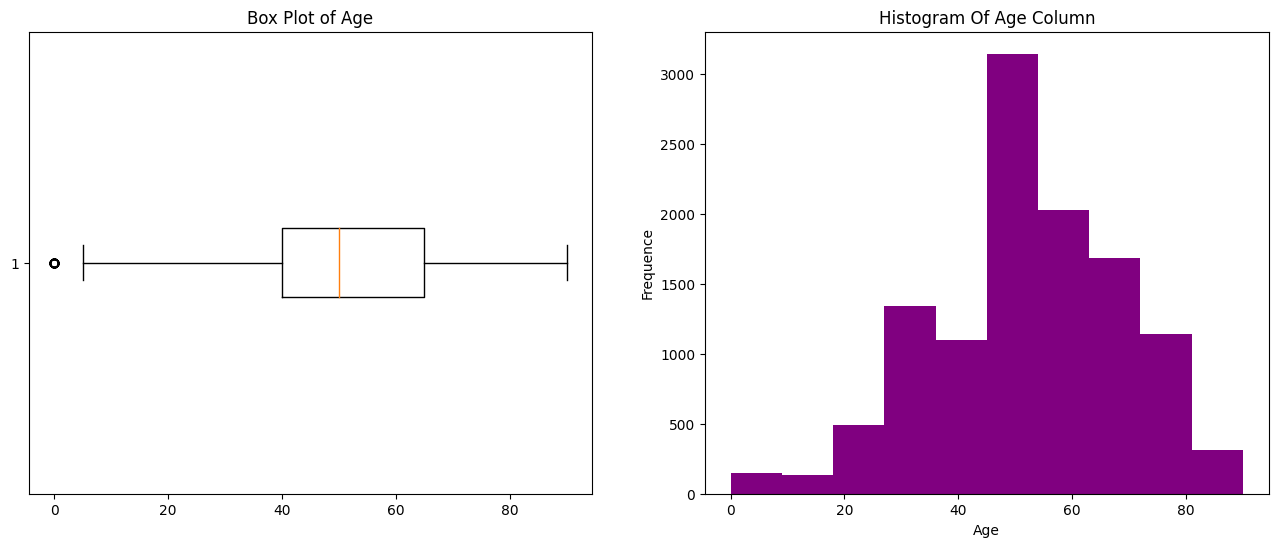

In [87]:
# set the figure size
figSize = [16,6]

# function to demo age distribution using visualizations
visualizeAgeDistribtution(HAM10000MetaData['Age'], 'Box Plot of Age', 'Histogram Of Age Column',
                          ['Age','Frequence'], figSize)

### Getting image path of each record

<div class="alert alert-block alert-info">
Now we're done with preprocessing of the meta deta. Let's import the images from directories. <br>
    
Firstly let's create a path column in our meta data dataset that contains the paths of images stored in our local directory which will be used to import the images
    

</div>

In [88]:
# print first 5 records of metadeta dataset 
HAM10000MetaData.head(5)

,Image ID,Age,Sex,Location,Label,Label Type
0,ISIC_0027419,80.0,male,scalp,bkl,histo
1,ISIC_0025030,80.0,male,scalp,bkl,histo
2,ISIC_0026769,80.0,male,scalp,bkl,histo
3,ISIC_0025661,80.0,male,scalp,bkl,histo
4,ISIC_0031633,75.0,male,ear,bkl,histo


In [89]:
# variables to store path of each directory containing images
HAM10000Images1Path = './HAM10000Updated/HAM10000_images_part_1/'
HAM10000Images2Path = './HAM10000Updated/HAM10000_images_part_2/'
HAM10000Images3Path = './HAM10000Updated/ISIC2018_Task3_Test_Images/'

# array to store all image directory paths
HAM10000ImagesPaths = [HAM10000Images1Path, HAM10000Images2Path, HAM10000Images3Path]

In [90]:
# The code written by me ends here.

# i got this code below from internet and adapted it according to my use

In [91]:
def find_image_path(image_id):
    '''
    Returns the absolute path of the image stored in local directory based on the image_id . It also uses
    global variable HAM10000ImagesPaths containing an array of absolute paths of directories that contain
    images, which need to be looked at while finding the image
    
    parameters: 
    image_id: the image id of the image whose path is to be found
    

    output: 
    returns the absolute path of image stored in local directory
    
    '''
    for directory in HAM10000ImagesPaths:
        potential_path = os.path.join(directory, f"{image_id}.jpg")
        if os.path.exists(potential_path):
            return potential_path
    return None

In [92]:
# path is added to each record using the function
HAM10000MetaData['path'] = HAM10000MetaData['Image ID'].apply(find_image_path)

# Remove rows where path was not found
HAM10000MetaData = HAM10000MetaData[HAM10000MetaData['path'].notnull()]

In [93]:
# code taken from internet and adapted according to my use ends here

# The code below is written by me.

In [94]:
# print first 5 records of metadata
HAM10000MetaData.head(5)

,Image ID,Age,Sex,Location,Label,Label Type,path
0,ISIC_0027419,80.0,male,scalp,bkl,histo,./HAM10000Updated/HAM10000_images_part_1/ISIC_...
1,ISIC_0025030,80.0,male,scalp,bkl,histo,./HAM10000Updated/HAM10000_images_part_1/ISIC_...
2,ISIC_0026769,80.0,male,scalp,bkl,histo,./HAM10000Updated/HAM10000_images_part_1/ISIC_...
3,ISIC_0025661,80.0,male,scalp,bkl,histo,./HAM10000Updated/HAM10000_images_part_1/ISIC_...
4,ISIC_0031633,75.0,male,ear,bkl,histo,./HAM10000Updated/HAM10000_images_part_2/ISIC_...


## Sampling

### Under Sampling 

In [95]:
# Importing the necessary libraries

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [96]:
# display class distribution in HAM10000MetaData Dataset
printDistribution(HAM10000MetaData["Label"], printColor['red'])

Before numberical: 
Label
nv       7613
bkl      1316
mel      1284
bcc       607
akiec     370
vasc      177
df        159
Name: count, dtype: int64


In [97]:
def underSampling(dataset, className, underSampleSize):
    '''
    does undersampling on the desired class by reducing the number of it instances
    
    parameters: 
    dataset: the dataset on which undersampling will be done
    className: the class on which undersampling needs to be done
    underSampleSize: a number indicating the total number of sample the undersampled class needs to have
    
    output: 
    returns the updated dataset with undersampling
    
    '''
    
    nvClass = dataset[dataset['Label'] == className]
    nvClass = nvClass.sample(underSampleSize)
    dataset = dataset[dataset['Label'] != className]
    dataset = pd.concat([dataset, nvClass], axis=0)
    return dataset

In [98]:
# function call to do undersampling 
HAM10000MetaData = underSampling(HAM10000MetaData, 'nv', 3000)

In [99]:
# display class distribution in HAM10000MetaData Dataset
printDistribution(HAM10000MetaData["Label"], printColor['red'])

Before numberical: 
Label
nv       3000
bkl      1316
mel      1284
bcc       607
akiec     370
vasc      177
df        159
Name: count, dtype: int64


### Over Sampling 

In [100]:
# The code written by me ends here.

# code is taken from internet and adapted to my use

In [101]:
def overSampling(dataset):
    '''
    does oversampling on the desired classes by diplicatiing and increasing the number of its instances
    
    parameters: 
    dataset: the dataset on which oversamping will be done
    overSampleclassesDict: dict containing the ratio to which each class will be oversampled
    
    output: 
    returns the updated dataset with oversampling
    
    ''' 
    
    overSampledData = pd.DataFrame()

    for label, val in eachClassOverSampleSize.items():

        eachClass = dataset[dataset['Label'] == label]

        if val > 1:
            updatedClass = eachClass.sample(frac=val, replace=True, random_state=199)
        else:
            # No change
            updatedClass = eachClass

        overSampledData = pd.concat([overSampledData, updatedClass], axis=0)

    # Shuffle the DataFrame to mix classes well
    overSampledData = overSampledData.sample(frac=1).reset_index(drop=True)
    
    return overSampledData

In [102]:
# dict to store oversampling rate for each class
eachClassOverSampleSize = {
    'nv': 1,  
    'mel': 2.1,    
    'bkl': 2.2,    
    'bcc': 4.5, 
    'akiec':8,    
    'vasc': 16 ,    
    'df': 17  ,  
}

# function call to do oversampling
HAM10000MetaData = overSampling(HAM10000MetaData)

In [103]:
# code taken from internet and adapted to my use ends here

# The code below is written by me

In [104]:
# display class distribution in HAM10000MetaData Dataset
printDistribution(HAM10000MetaData["Label"], printColor['red'])

Before numberical: 
Label
nv       3000
akiec    2960
bkl      2895
vasc     2832
bcc      2732
df       2703
mel      2696
Name: count, dtype: int64


### Importing the Images

<div class="alert alert-block alert-info">
Uptil now we've only worked on meta deta. Now lets import the images aw well and do image data augmentation on them. 
</div>

In [105]:
# setting image data generator for data augmentation
imagesDataGen = ImageDataGenerator(
rotation_range=30,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.4,
zoom_range=0.1,
horizontal_flip=True,
vertical_flip=True,
fill_mode='nearest')

In [106]:
def getImages(dataset):
    '''
    Imports images, performas image data augmentation and returns a numpy arrray containing images data/
    
    parameters: 
    dataset: The dataset containing records for which all imaages will be imported based on the path column of
    each record
    
    output: 
    returns numpy array containg images that are augmented
    
    ''' 
    # list to store the images
    augImages = []

    # iterate over the metadata DataFrame and load the images
    for index, row in dataset.iterrows():
        filename = row['path']
        found = False

        # load the image as a PIL Image object
        image = Image.open(filename).convert('RGB')

        # resize the image to the desired dimensions and convert it to a NumPy array
        image = image.resize((64, 85))
        image = np.asarray(image)

        images = np.expand_dims(image, axis=0)
        
        # image data augmentation
        augmented_images = imagesDataGen.flow(images, batch_size=1)

        augmented_image = next(augmented_images)[0].astype('uint8')
        augImages.append(augmented_image)    
        
    return augImages

In [107]:
# function call to import and augment images
augmentedImages = getImages(HAM10000MetaData)
# converting augmentaed images array to numpy array
augmentedImages = np.asarray(augmentedImages)
# print shape of the array
augmentedImages.shape

(19818, 85, 64, 3)

<div class="alert alert-block alert-info">
Let's prepare image data for the model by resizing it's pixel values to range between 0-1
</div>

In [108]:
#  Rescalling the images data
reScaledImages = augmentedImages/255.0

### One Hot Encoding the Target Labels

In [109]:
from sklearn.preprocessing import OneHotEncoder 
from keras.utils import to_categorical

# one hot encoding the labels
oneHotLabels = HAM10000MetaData['Label']

oneHotLabels = oneHotLabels.astype('category') 

oneHotLabels = oneHotLabels.cat.codes

oneHotLabels = to_categorical(oneHotLabels)

oneHotLabels[0]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [110]:
oneHotLabels.shape

(19818, 7)

<div class="alert alert-block alert-info">
Now lets split the meta deta and images for training,validation and testing
</div>

In [136]:
# Code written by me ends here

# Code below is taken from internet and adapted according to my use

In [111]:
def testTrainSplit(data, labels, test_size = 0.25):
    '''
    Splits the data, and labels in two equal splits preserving the propoertion in which they are distributed
    
    parameters: 
    data: The data that needs to be spliited
    labels: The labels that needs to be spliited
    test_size: The split ratio between train and test
    
    output: 
    returns 4 variables in which there are 2 splits(train/test) of data and 2 splits(train/test) of labels.
    
    '''
        
    trainData, testData, trainLabels, testLabels= train_test_split(
        data, labels, test_size=0.25, random_state=199,
        stratify = labels)

    return trainData, testData, trainLabels, testLabels

In [112]:
# Function call to split the data
trainingMetaData, testingMetaDeta, trainingMetaLabels, testingMetaLabels = testTrainSplit(HAM10000MetaData, 
                                                                                          HAM10000MetaData['Label'],
                                                                                          test_size = 0.2)
# Function call to split the data
trainingImages, testingImages,trainingImagesLabels, testingImagesLabels = testTrainSplit(reScaledImages,
                                                                                         oneHotLabels, 
                                                                                         test_size = 0.2)

In [113]:
# Function call to split the data
trainingMetaData, valMetaDeta, trainingMetaLabels, valMetaLabels= testTrainSplit(trainingMetaData,
                                                                                 trainingMetaLabels,
                                                                                 test_size=0.3)
# Function call to split the data
trainingImages, valImages,trainingImagesLabels, valImagesLabels = testTrainSplit(trainingImages,
                                                                                 trainingImagesLabels, 
                                                                                 test_size=0.3)

In [137]:
# code taken from internet ends here

# code below is written by me

In [114]:
def printShape(data, dataName, colorCode):
    '''
    Prints the data shape in a specific color
    
    parameters: 
    data: the data whose sape needs to be printed
    dataName: name of the data
    colorCode: code for colored print statment
    
    output: print statements indicating shape of data
    '''  

    print("\033[1;{}m {} shape is {}\n".format(colorCode, dataName, data.shape))

In [115]:
# print statements to show shape for each variable

printShape(trainingMetaData, 'Train Meta Data', 32)
printShape(valMetaDeta, 'Val Meta Data', 32)
printShape(testingMetaDeta, 'Test Meta Data', 32)


printShape(trainingMetaLabels, 'Train Meta Labels', 31)
printShape(valMetaLabels, 'Val Meta Label', 31)
printShape(testingMetaLabels, 'Test Meta Label', 31)

printShape(trainingImages, 'Train Images Data', 34)
printShape(valImages, 'Val Images Data', 34)
printShape(testingImages, 'Test Images Data', 34)

printShape(trainingImagesLabels, 'Train Images Labels', 35)
printShape(valImagesLabels, 'Val Images Label', 35)
printShape(testingImagesLabels, 'Test Images Label', 35)

 Train Meta Data shape is (11147, 7)

 Val Meta Data shape is (3716, 7)

 Test Meta Data shape is (4955, 7)

 Train Meta Labels shape is (11147,)

 Val Meta Label shape is (3716,)

 Test Meta Label shape is (4955,)

 Train Images Data shape is (11147, 85, 64, 3)

 Val Images Data shape is (3716, 85, 64, 3)

 Test Images Data shape is (4955, 85, 64, 3)

 Train Images Labels shape is (11147, 7)

 Val Images Label shape is (3716, 7)

 Test Images Label shape is (4955, 7)



<div class="alert alert-block alert-success">
We've successfully spplitted the metadeta,images and labels
</div>

<div class="alert alert-block alert-info">
Now let's separate inputs from metadeta columns by converting them to numpy arrays
</div>

In [116]:
# Now lets separate each input from meta deta dataframes
def separateInputs(data, cols):
    '''
    function that separates columns in a dataframe by storing each column as numpy array
    
    parameters: 
    data: the dataset whose columns will be separated
    cols: the name columns that need to separated
    
    output: numpy arrays of separated columns
    '''  
    
    age = np.array(data[cols[0]])
    sex = np.array(data[cols[1]])
    location = np.array(data[cols[2]])
    labelType = np.array(data[cols[3]])
    
    return age, sex, location, labelType

In [117]:
columnsToSep = ['Age', 'Sex', 'Location', 'Label Type']

# separate each column from dataset into a numpy array
ageTrain, sexTrain, locationTrain, typeTrain = separateInputs(trainingMetaData, columnsToSep)

ageVal, sexVal, locationVal, typeVal = separateInputs(valMetaDeta, columnsToSep)

ageTest, sexTest, locationTest, typeTest = separateInputs(testingMetaDeta, columnsToSep)

<div class="alert alert-block alert-success">
We've scuessfully separated the metadeta input</div>

<div class="alert alert-block alert-info">
Now let's encode the data before feeding it into the neural network
</div>

In [118]:
# normalize the age column
from sklearn.preprocessing import MinMaxScaler

ageTrain = ageTrain.reshape(-1, 1)  
ageVal = ageVal.reshape(-1, 1)  
ageTest = ageTest.reshape(-1, 1)  

scaler = MinMaxScaler()

ageTrainScal = scaler.fit_transform(ageTrain)
ageValScal = scaler.fit_transform(ageVal)
ageTestScal = scaler.fit_transform(ageTest)


In [119]:
# The code written by me ends here.

# code is taken from internet and adapted to my use

In [120]:
from sklearn.preprocessing import LabelEncoder

def categoricalEncode(data1,data2,data3):
    '''
    function that categorically encodes data
    
    parameters: 
    data1: the data to be label encoded
    data2: the data to be label encoded
    data3: the data to be label encoded
    
    output: outputs the encoded data1, data2, data3
    '''  

    encoder = LabelEncoder()
    
    trainCat = encoder.fit_transform(data1)
    valCat = encoder.fit_transform(data2)
    testCat = encoder.fit_transform(data3)
    
    return trainCat, valCat, testCat

In [121]:
# label encode all categorical values columns
sexTrainEnc, sexValEnc, sexTestEnc = categoricalEncode(sexTrain,sexVal,sexTest)

labelTypeTrainEnc, labelTypeValEnc, labelTypeTestEnc= categoricalEncode(typeTrain,typeVal, typeTest)

locationTrainEnc, locationValEnc, locationTestEnc= categoricalEncode(locationTrain,locationVal,
                                                                             locationTest)

In [122]:
# code taken from internet and adapted to my use ends here

<div class="alert alert-block alert-success">
We've successfully pre-processed the data. In the next section lets create a baseline model
</div>

### Developing a model that does better than the baseline

<div class="alert alert-block alert-info">
In this section we'll be creating the simplest possible model that is able to beat the commonsense baseline which is around 14%
</div>

In [123]:
# importing the necessary libraries
from tensorflow.keras.layers import Input, Dense, Concatenate, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.utils import plot_model as visualizeModel
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from sklearn.metrics import classification_report

from tensorflow.keras import layers

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

In [125]:
def baselineImageModel(imageInput):
    '''
    function that passes an image input into a small convolutional neural network to get a an output
    
    parameters: 
    imageInput: the iamge input that needs to be passed in a cnn
    
    output: returns the ouput of cnn 
    '''  

    imageBranch = Conv2D(16, (3, 3), activation='relu')(imageInput)
    imageBranch = MaxPooling2D((2, 2))(imageBranch)
    imageBranch = Flatten()(imageBranch)
    imageBranch = Dense(32, activation='relu')(imageBranch)
    return imageBranch


In [126]:
# Initiaize Input layer for image input
HAM10000ImageInput = Input(shape= (85, 64, 3), name='imageInput') 
# function call to pass image input through convolutional neural network
HAM10000ImageBranch = baselineImageModel(HAM10000ImageInput)

# Initiaize Shape meta deta input
HAM10000MetaDetaInputShape = (1,) 

# define dense layers for re-usability
dense8 = Dense(8, activation='relu')
dense16 = Dense(16, activation='relu')

# Initialize Input layer for age input
ageInput = Input(shape=HAM10000MetaDetaInputShape, name='ageInput')
# pass the age input through a dense layer already initialized
ageBranch = dense8(ageInput)

# Initialize Input layer for sex input
sexInput = Input(shape=HAM10000MetaDetaInputShape, name='sexInput')
# pass the sex input through a dense layer already initialized
sexBranch = dense8(sexInput)

# Initialize Input layer for label type input
labelTypeInput = Input(shape=HAM10000MetaDetaInputShape, name='labelTypeInput')
# pass the label Type input through a dense layer already initialized
labelTypeBranch = dense16(labelTypeInput)

# Initialize Input layer for location input
locationInput = Input(shape=HAM10000MetaDetaInputShape, name='locationInput')
# pass the location Input input through a dense layer already initialized
locationBranch = dense16(locationInput)

# apply different weightage to each branch
imageBranchWeight = 0.6
metaDetaBranchWeight = 0.1

# assigning different weightage to each branch
HAM10000ImageBranch = HAM10000ImageBranch * imageBranchWeight
ageBranch = ageBranch * metaDetaBranchWeight
sexBranch = sexBranch * metaDetaBranchWeight
labelTypeBranch = labelTypeBranch * metaDetaBranchWeight
locationBranch = locationBranch * metaDetaBranchWeight

# concatenate all the branches 
concatenatedBranch = Concatenate()([HAM10000ImageBranch,ageBranch, sexBranch, labelTypeBranch, 
                                 locationBranch])

concatenatedBranch = Dense(64, activation='relu')(concatenatedBranch)

# Final layer for prediction
combinedPredictionBranch = Dense(7, activation='softmax')(concatenatedBranch)

# Creating the prototype model
prototypeModel = Model(inputs=[HAM10000ImageInput, ageInput, sexInput, labelTypeInput, locationInput],
                       outputs=combinedPredictionBranch)


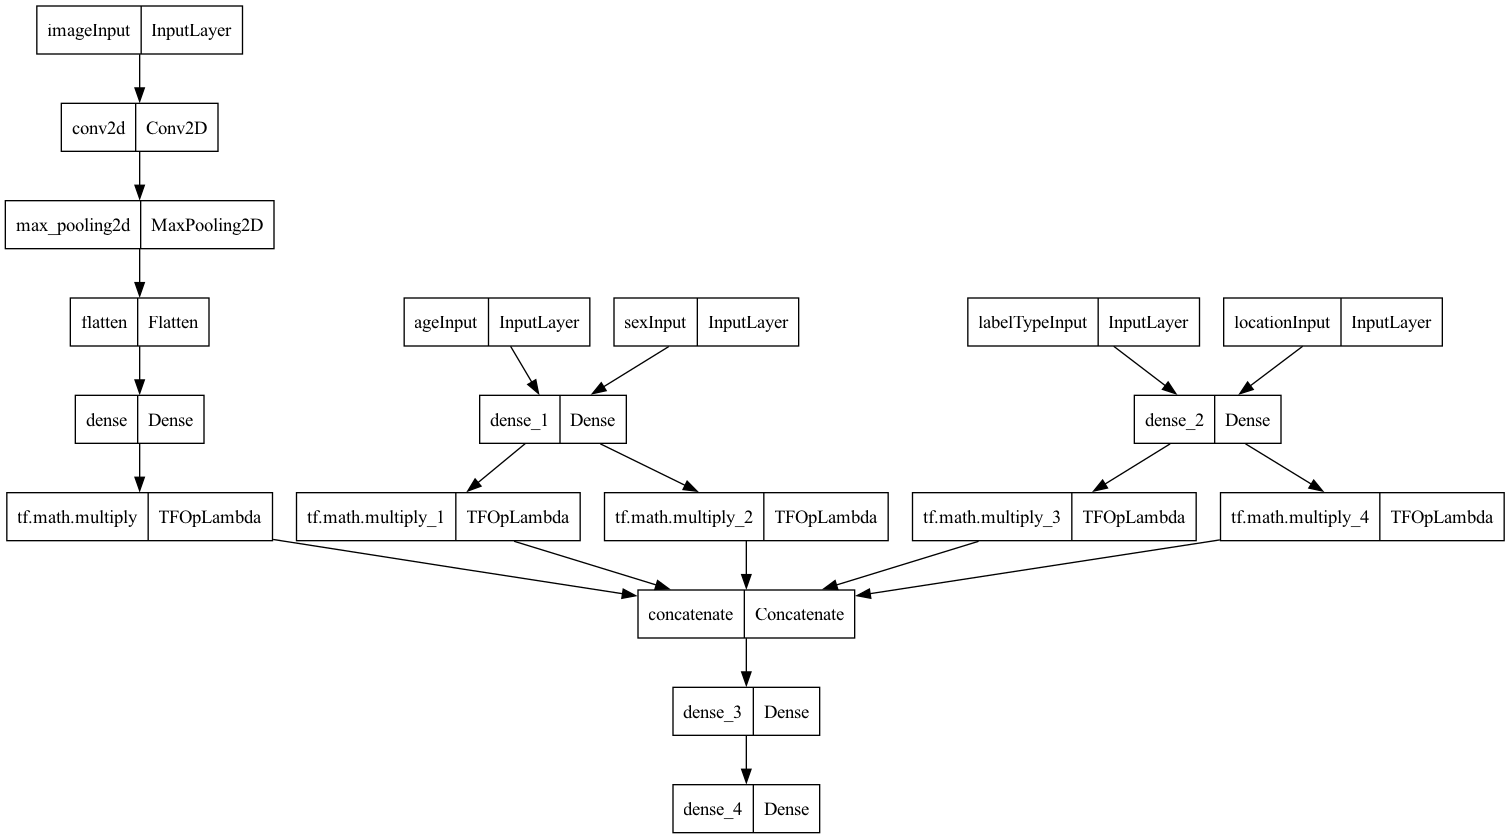

In [127]:
# Graphical representation of the model structure
visualizeModel(prototypeModel)

In [128]:
# Complie protoype model
prototypeModel.compile(optimizer='adam', 
                       loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
# Train protoype model on validation data
prototypeModelHist = prototypeModel.fit([trainingImages, ageTrainScal, sexTrainEnc, labelTypeTrainEnc,
                                           locationTrainEnc], trainingImagesLabels, 
          validation_data=([valImages, ageValScal, sexValEnc, labelTypeValEnc, locationValEnc], 
                           valImagesLabels), 
          batch_size=128, epochs=3)

Epoch 1/3
88/88 [==============================] - 23s 237ms/step - loss: 1.8701 - accuracy: 0.2330 - val_loss: 1.7859 - val_accuracy: 0.2756
Epoch 2/3
88/88 [==============================] - 18s 204ms/step - loss: 1.7438 - accuracy: 0.3049 - val_loss: 1.7122 - val_accuracy: 0.3181
Epoch 3/3
88/88 [==============================] - 19s 218ms/step - loss: 1.6313 - accuracy: 0.3580 - val_loss: 1.5596 - val_accuracy: 0.3724


In [130]:
def visualizeResults(history):
    '''Function that take history object of a trained model to visually show how it has performed by
    2 graphs.
    
    Parameter: 
    history: the history object of a model 
    
    Output:
    Graph 1: compares training loss and validation loss over total epoches    
    Graph 2: compares training accuracy and validation accuracy over total epoches
    '''    
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))
    
    
    ax[0].plot(history.history['loss'], label = 'training loss')
    ax[0].plot(history.history['val_loss'], label = 'validation loss')
    ax[0].set(xlabel = "epoch", ylabel = "score", title='Training vs Validation loss')
    ax[0].legend(loc = 'upper right')
    
    ax[1].plot(history.history['accuracy'], label = 'training accuracy')
    ax[1].plot(history.history['val_accuracy'], label = 'validation accuracy')
    ax[1].set(xlabel = "epoch", ylabel = "score", title='Training vs Validation accuracy')
    ax[1].legend(loc = 'upper right')


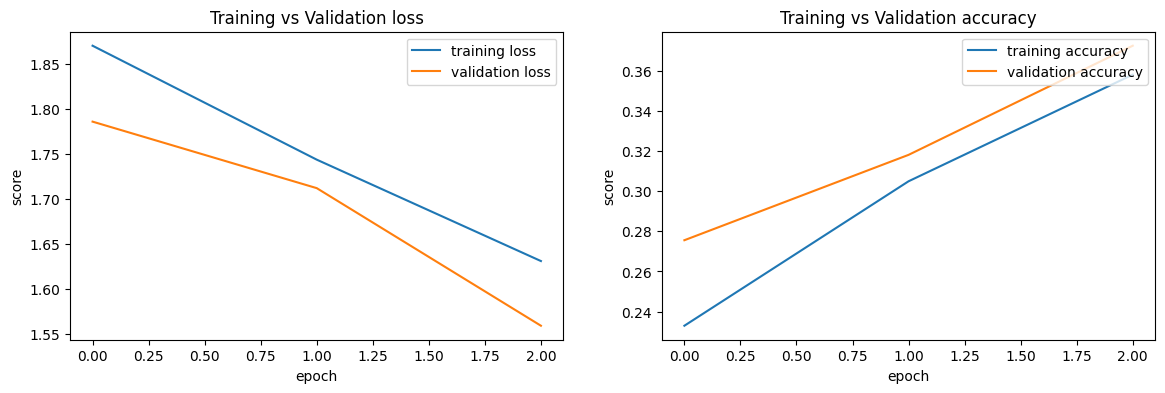

In [131]:
# Function call to display prototype model results
visualizeResults(prototypeModelHist)

### Scaling up: developing a model that overfits

<div class="alert alert-block alert-info">
In this section we'll start of by creating a bigger model than baseline model. But here's the twist we'll
be creating two similar models, one with residual connections and other without. We'll choose the better amongst them moving forward in the expermientation</div>

In [231]:
# The code below is written by me

In [65]:
def residualModel(imageInput):     
    '''
    function that passes an image input into a residual convolutional neural network to get an output
    
    parameters: 
    imageInput: the image input that needs to be passed in a residual cnn
    
    output: returns the ouput of residual cnn 
    '''   
    imageBranch = Conv2D(32,(3, 3),padding='valid',activation='relu')(imageInput)
    imageBranch = Conv2D(32,(3, 3),padding='valid',activation='relu')(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    imageBranch = Conv2D(24,(3,3),padding='same',activation='relu')(imageBranch)
    residualData = imageBranch
    imageBranch = Conv2D(24,(3,3),padding='same',activation='relu')(imageBranch)
    imageBranch = Conv2D(24,(3,3),padding='same',activation='relu')(imageBranch)
    imageBranch = layers.add([imageBranch, residualData])
    imageBranch = MaxPool2D((2,2))(imageBranch)
    imageBranch = Conv2D(10,(3,3),padding='valid',activation='relu')(imageBranch)
    
    imageBranch = Flatten()(imageBranch)
    imageBranch = Dense(256, activation='relu')(imageBranch)   
    imageBranch = Dense(128, activation='relu')(imageBranch)   
    
    return imageBranch

def normalModel(imageInput):
    '''
    function that passes an image input into a convolutional neural network to get an output
    
    parameters: 
    imageInput: the image input that needs to be passed in a cnn
    
    output: returns the ouput of cnn 
    '''  
    imageBranch = Conv2D(32,(5, 5),padding='valid',activation='relu')(imageInput)
    imageBranch = Conv2D(32,(3, 3),padding='valid',activation='relu')(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    imageBranch = Conv2D(24,(3,3),padding='valid',activation='relu')(imageBranch)
    imageBranch = Conv2D(24,(3,3),padding='valid',activation='relu')(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    
    imageBranch = Conv2D(16,(3,3),padding='valid',activation='relu')(imageBranch)
    imageBranch = Conv2D(10,(3,3),padding='valid',activation='relu')(imageBranch)
    
    imageBranch = Flatten()(imageBranch)
    imageBranch = Dense(256, activation='relu')(imageBranch)   
    imageBranch = Dense(128, activation='relu')(imageBranch)   
    
    return imageBranch

def imageModel(imageInput, Mtype):
    '''
    function that assigns imageInput to correct convolutional model based on the Mtype param
    
    parameters: 
    imageInput: the image input that needs to be passed in a cnn
    Mtype: Determines which cnn should be used
    
    output: returns the ouput of cnn 
    '''  
    if Mtype == 'residual':
        imageModelOut =  residualModel(imageInput)
    else:
        imageModelOut =  normalModel(imageInput)
    return imageModelOut     

In [66]:
def normalMetaModel1(metaDetaInput):
    '''
    function that passes an metadeta into a small feed-forward network get an output
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a feed-forward network
    
    output: returns the ouput of feed-forward network
    '''   
    metaDetaBranch = Dense(32, activation='relu')(metaDetaInput)
    metaDetaBranch = Dense(16, activation='relu')(metaDetaBranch)
    return metaDetaBranch

def normalMetaModel2(metaDetaInput):
    '''
    function that passes an metadeta into a slightly bigger feed-forward network get an output
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a feed-forward network
    
    output: returns the ouput of feed-forward network
    '''   
    metaDetaBranch = Dense(64, activation='relu')(metaDetaInput)
    metaDetaBranch = Dense(32, activation='relu')(metaDetaBranch)
    return metaDetaBranch

def residualMetaModel1(metaDetaInput):
    '''
    function that passes an metadeta into smaller residual feed-forward network get an output
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(32, activation='relu')(metaDetaInput)
    residualData = metaDetaBranch
    metaDetaBranch = Dense(32, activation='relu')(metaDetaBranch)
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dense(16, activation='relu')(metaDetaBranch)
    return metaDetaBranch

def residualMetaModel2(metaDetaInput):
    '''
    function that passes an metadeta input into a slightly bigger residual feed-forward network get an output
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(64, activation='relu')(metaDetaInput)
    residualData = metaDetaBranch
    metaDetaBranch = Dense(64, activation='relu')(metaDetaBranch)
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dense(32, activation='relu')(metaDetaBranch)
    return metaDetaBranch

def metaModel1(metaInput, mType):
    '''
    function that assigns meta input to desired feed-forward network type based on the mType param
    
    parameters: 
    imageInput: the meta input that needs to be passed in desired feed-forward network
    Mtype: Determines which cnn should be used
    
    output: returns the ouput of feed-forward network
    '''  
    if mType == 'residual':
        metaModelOut =  residualMetaModel1(metaInput)
    else:
        metaModelOut =  normalMetaModel1(metaInput)
    return metaModelOut  

def metaModel2(metaInput, mType):
    '''
    function that assigns meta input to desired feed-forward network type based on the mType param
    
    parameters: 
    imageInput: the meta input that needs to be passed in desired feed-forward network
    Mtype: Determines which cnn should be used
    
    output: returns the ouput of feed-forward network
    '''  
    if mType == 'residual':
        metaModelOut =  residualMetaModel2(metaInput)
    else:
        metaModelOut =  normalMetaModel2(metaInput)
    return metaModelOut  

In [67]:
def concatModel(imgBranch, metaDeta1, metaDeta2, metaDeta3, metaDeta4):
    '''
    function that concatenates 5 different branches by assigning them weightage in ratio 6:1:1:1:1. 
    Furthermore it passes the concatenated layer into dense layers and ending it with a final softmax layer.
    
    parameters: 
    imgBranch: output from the image branch
    metaDeta1: output from the metadeta1
    metaDeta2: output from the metadeta2
    metaDeta3: output from the metadeta3
    metaDeta4: output from the metadeta4
    
    output: returns the ouput of feed-forward network
    '''  
    
    # initialize weightage for different branches    
    imageBranchWeight = 0.6
    metaDetaBranchWeight = 0.1

    # assigning different weightage to each branch
    imgBranch = imgBranch * imageBranchWeight
    metaDeta1 = metaDeta1 * metaDetaBranchWeight
    metaDeta2 = metaDeta2 * metaDetaBranchWeight
    metaDeta3 = metaDeta3 * metaDetaBranchWeight
    metaDeta4 = metaDeta4 * metaDetaBranchWeight
    
    # concatenate multiple inputs    
    concatBranch = Concatenate()([imgBranch,metaDeta1, metaDeta2, metaDeta3, metaDeta4])

    concatBranch = Dense(256, activation='relu')(concatBranch)
    concatBranch = Dense(128, activation='relu')(concatBranch)

    concatBranch = Dense(7, activation='softmax')(concatBranch)
    return concatBranch

In [68]:
def trainValidate(model, trainD, trainL,valD,valL, logDir,epochesN):
    '''
    function that trains the model over several epoches. It uses tesnsorboard call back as well
    
    parameters: 
    model: model to be trained
    trainD: training data
    trainL: training label
    valD: validation data
    valL: validation label
    logDir: directory name to store tensorboard data
    epochesN: number of epoches to train on
    
    output: 
    model: the trained model
    modelHist: trained model's performance
    '''  
    
    os.makedirs(logDir, exist_ok=True)  
    callbacks = [
    TensorBoard(
        log_dir=logDir,
        histogram_freq=1,
        embeddings_freq=1,
) ]
    
    modelHist = model.fit(trainD, trainL, validation_data=(valD,valL), batch_size=128,
                    epochs= epochesN, callbacks = callbacks)
    return modelHist, model

In [69]:
def biggerModelFunc(trainModelList, trainLabels,valData,valLabels, modelType, logDir, epochesNum = 10): 
    '''
    a neural network function that has multi input single output capability. It includes multiple models such
    as convolutional nerural network and feed-forward networks for different inputs. It includes model of 
    different types e.g residual and normal. Furthermore it uses callbacks such as tensorboard
    
    parameters: 
    trainModelList: training data
    trainLabels: training label
    valData: validation data
    valLabels: validation label
    modelType:
    logDir: directory name to store tensorboard data
    epochesN: number of epoches to train on
    
    output: 
    biggerModel: the trained model
    biggerModelHist: trained model's performance
    '''  
            
    HAM10000ImageInput = Input(shape= (85, 64, 3), name='imageInput') 
    
        
    HAM10000ImageBranch = imageModel(HAM10000ImageInput, modelType)

    

    HAM10000MetaDetaInputShape = (1,) 

    ageInput = Input(shape=HAM10000MetaDetaInputShape, name='ageInput')
    ageBranch = metaModel1(ageInput, modelType)


    sexInput = Input(shape=HAM10000MetaDetaInputShape, name='sexInput')
    sexBranch = metaModel1(sexInput, modelType)

    labelTypeInput = Input(shape=HAM10000MetaDetaInputShape, name='labelTypeInput')
    labelTypeBranch = metaModel2(labelTypeInput, modelType)

    locationInput = Input(shape=HAM10000MetaDetaInputShape, name='locationInput')
    locationBranch = metaModel2(locationInput, modelType)


    combinedPredictionBranch =  concatModel(HAM10000ImageBranch, ageBranch, sexBranch, labelTypeBranch, 
                                     locationBranch)
    


    biggerModel = Model(inputs=[HAM10000ImageInput, ageInput, sexInput, labelTypeInput, locationInput],
                           outputs=combinedPredictionBranch)

    biggerModel.compile(optimizer='adam', 
                           loss='categorical_crossentropy', metrics=['accuracy'])
    
    biggerModelHist, biggerModel = trainValidate(biggerModel, trainModelList, trainLabels,valData,valLabels, 
                                                 logDir, epochesNum)
    
    return biggerModelHist, biggerModel

In [70]:
# arrays to store multiple inputs for training
trainingData = [trainingImages, ageTrainScal, sexTrainEnc, labelTypeTrainEnc,locationTrainEnc]
trainingLabels = trainingImagesLabels
# arrays to store multiple inputs for validation
validationData = [valImages, ageValScal, sexValEnc, labelTypeValEnc, locationValEnc]
validationLabels = valImagesLabels    

In [74]:
# array to store model types
modelTypes = ['normal', 'residual']
# no. of iteration model is trained
NoOfepochs = 25

# array to hold results for each model type
modelTypeResultsArray = []
# array to hold model for each model type
modelTypeArray = []
# store each model
eachModelType = None
# store each model result
eachModelTypeHist = None
# directory name to store tensorboard data
logCount = 0

# loop over each model type and train on it 1 by 1
for i in range(len(modelTypes)):
    log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
    # function call to get trained model and trained model result    
    eachModelTypeHist, eachModelType = biggerModelFunc(trainingData, trainingLabels, validationData, validationLabels, 
                                  modelTypes[i], log_dir, NoOfepochs)
    # add each model type result in array    
    modelTypeResultsArray.append(eachModelTypeHist)
    # add each model in array
    modelTypeArray.append(eachModelType)
    logCount = logCount + 1

Epoch 1/25
88/88 [==============================] - 170s 2s/step - loss: 1.8821 - accuracy: 0.1917 - val_loss: 1.9467 - val_accuracy: 0.1895
Epoch 2/25
88/88 [==============================] - 127s 1s/step - loss: 1.7594 - accuracy: 0.2426 - val_loss: 1.7279 - val_accuracy: 0.2753
Epoch 3/25
88/88 [==============================] - 125s 1s/step - loss: 1.6916 - accuracy: 0.2838 - val_loss: 1.6170 - val_accuracy: 0.3393
Epoch 4/25
88/88 [==============================] - 122s 1s/step - loss: 1.6456 - accuracy: 0.3213 - val_loss: 1.8415 - val_accuracy: 0.2570
Epoch 5/25
88/88 [==============================] - 126s 1s/step - loss: 1.6705 - accuracy: 0.2926 - val_loss: 1.6022 - val_accuracy: 0.3184
Epoch 6/25
88/88 [==============================] - 126s 1s/step - loss: 1.5353 - accuracy: 0.3691 - val_loss: 1.6096 - val_accuracy: 0.3652
Epoch 7/25
88/88 [==============================] - 126s 1s/step - loss: 1.4441 - accuracy: 0.4082 - val_loss: 1.4508 - val_accuracy: 0.3921
Epoch 8/25
88

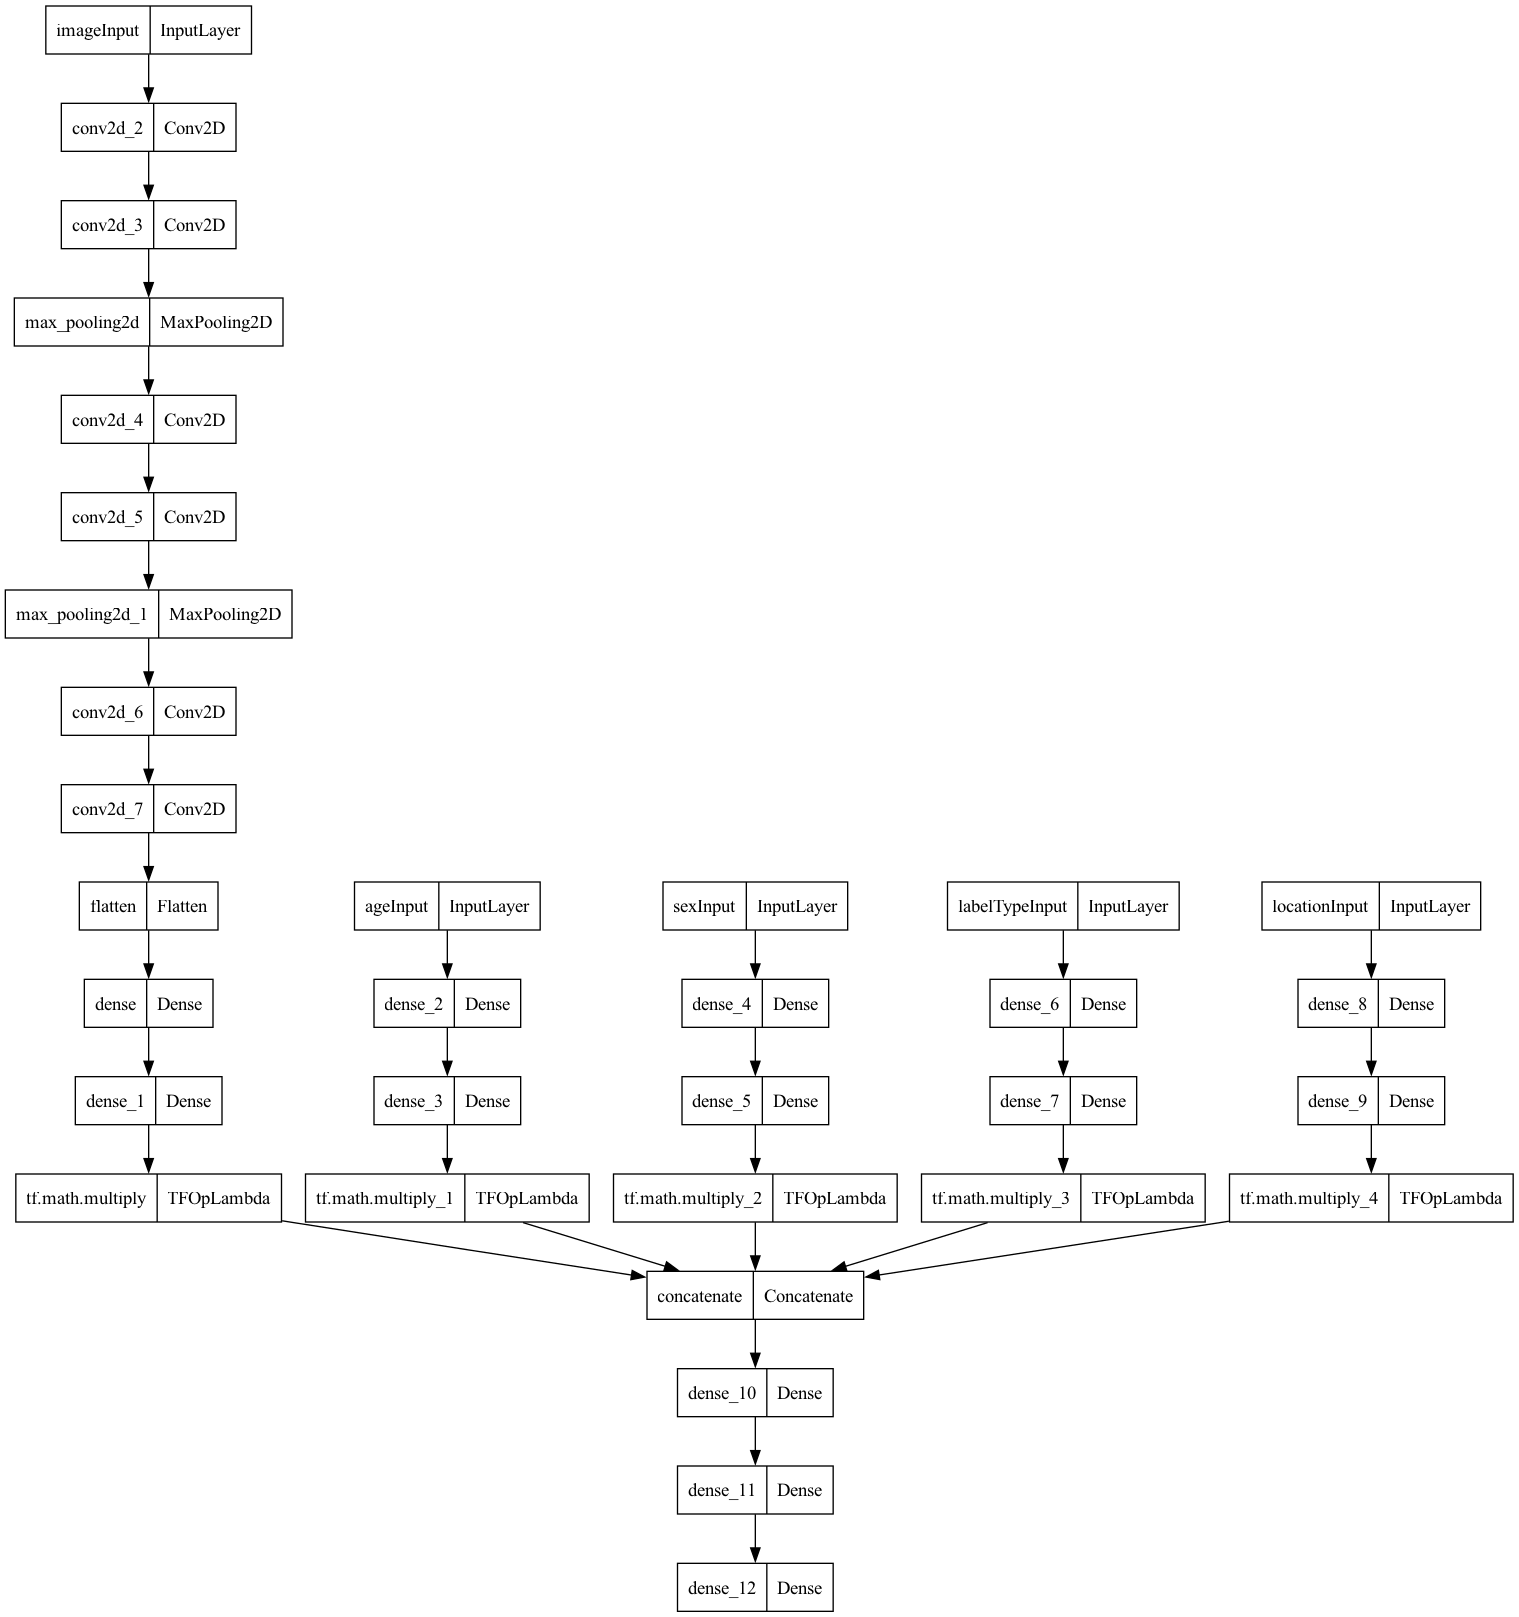

In [76]:
# see graphical view of model architecture
visualizeModel(modelTypeArray[0])

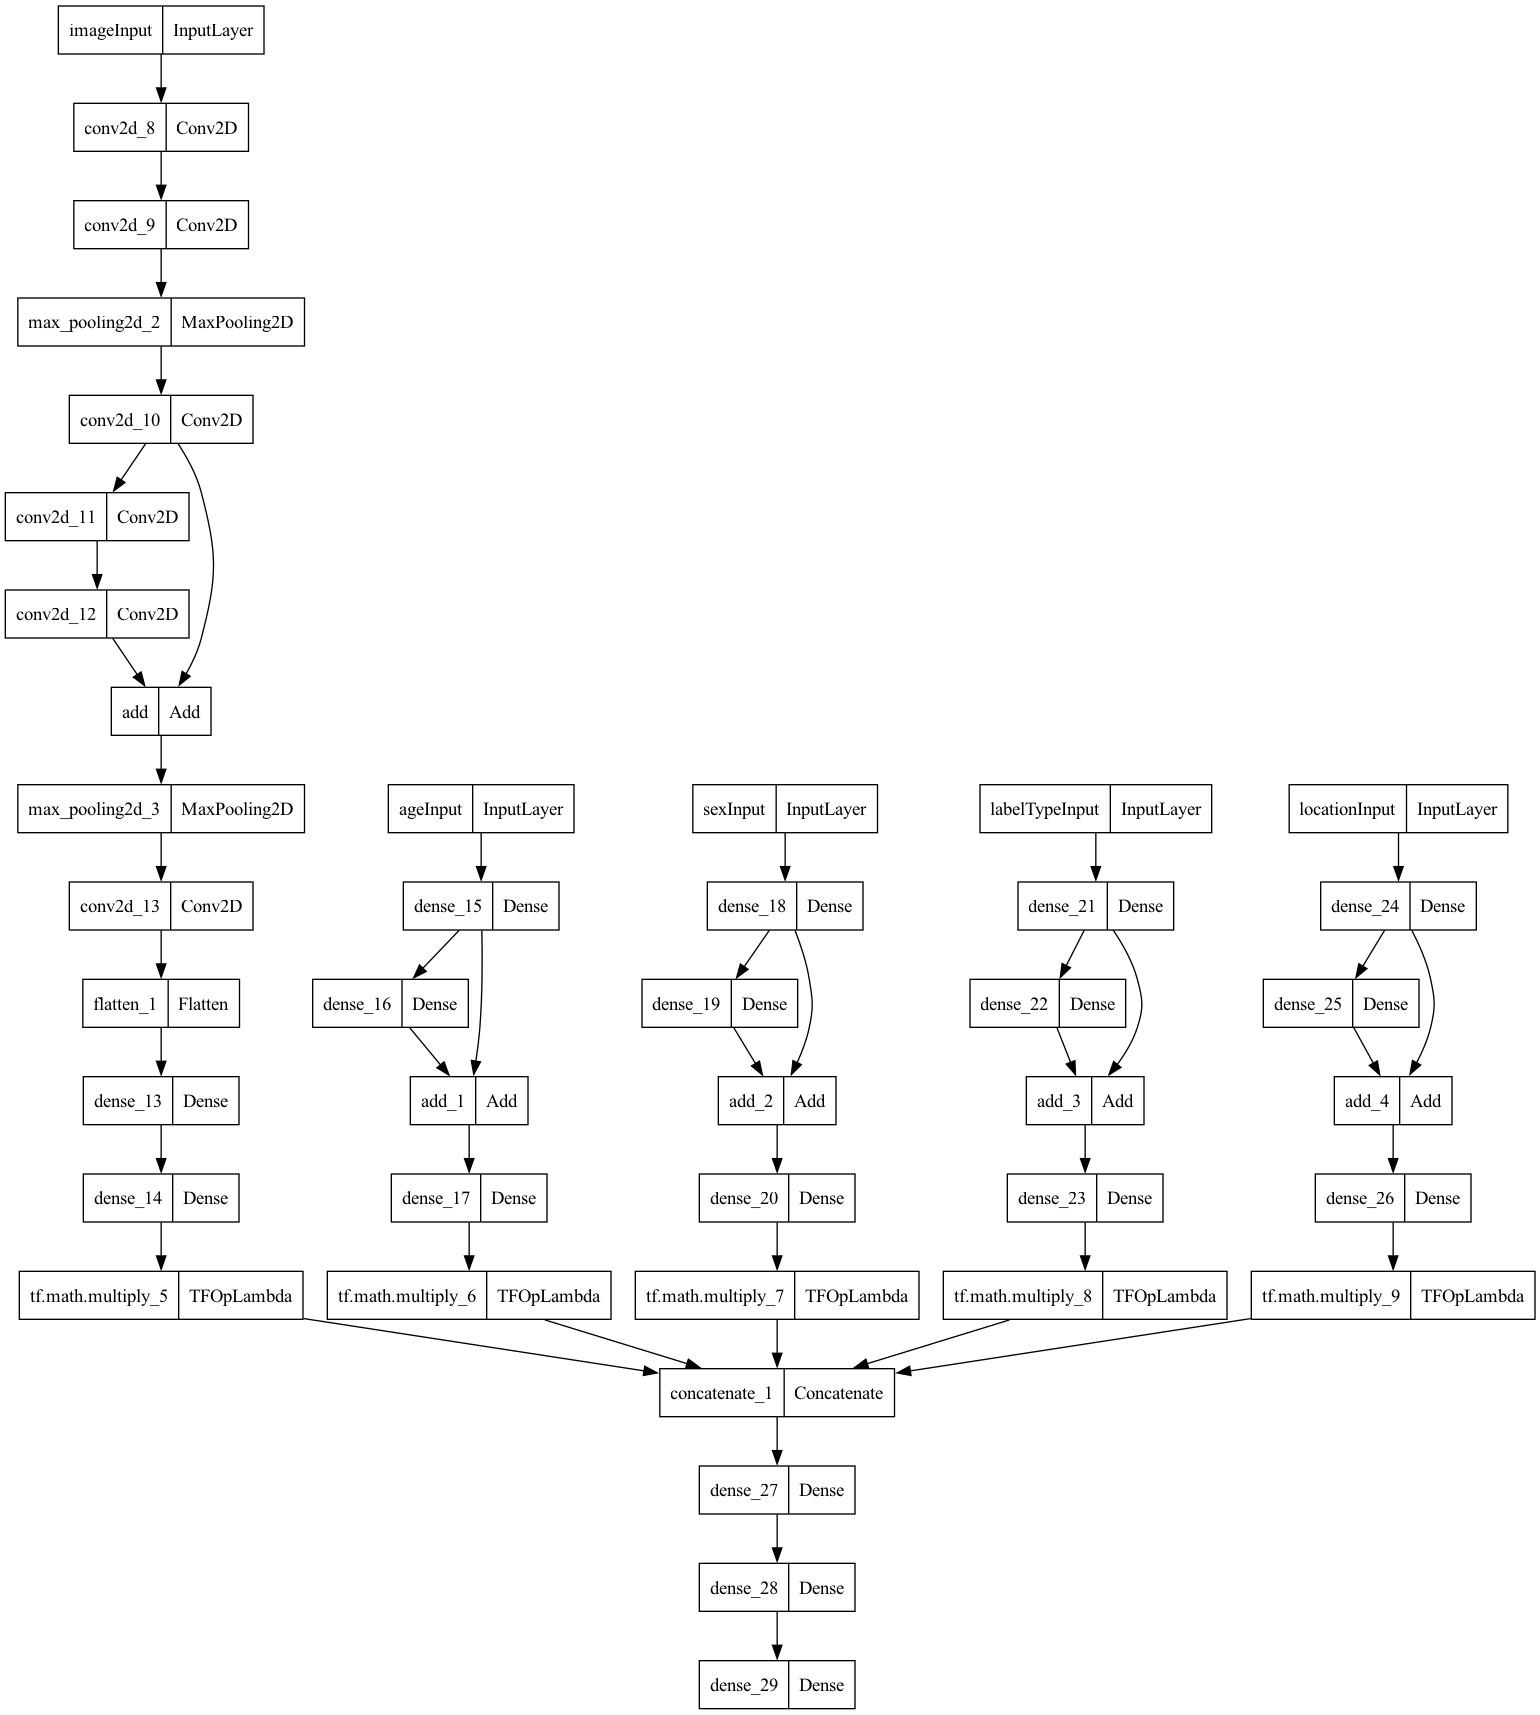

In [77]:
# see graphical view of model architecture
visualizeModel(modelTypeArray[1])

In [197]:
def evaluateResults(history, titles, imgName = None, bestModel = None, bestModelTitle= '', lossLegendPos = 'lower left',
                   accLegendPos = 'upper left'):
    '''Function that show the two or more models peroformances by showing their traning loss and validation 
    loss, training accuracy and validation accuracy over certain epcohes
    
    parameters:
    history: Array containing history object of two models to compare
    titles: Array holding title for deach models visualizations
    imgName(optional): the name of the image which will be saved
    bestModel(optional): a histroy object of 3rd model to be compared
    bestModelTitle(optional): title for 3rd model's visualizations
    lossLegendPos(optional): legend position on loss graph
    accLegendPos(optional): legend position on accuracy graph
    
    output: Displays line plots showing models performance
    '''
    
    totalFigs = len(history)
    
    if bestModel == None:
        subplotHeight = 15
        cols = len(history)
        
    else:
        subplotHeight = 15
        cols = len(history) + 1
        
    params = []
    
    fig, ax = plt.subplots(2, cols, figsize=(16, 10), gridspec_kw={'hspace': 0.3})
    
    for i in range(totalFigs):
            ax[0,i].plot(history[i].history['loss'], label = 'training loss')
            ax[0,i].plot(history[i].history['val_loss'], label = 'validation loss')
            ax[0,i].set(xlabel = "epoch", ylabel = "score", title= titles[i] + ' - Training vs Validation loss')
            ax[0,i].legend(loc = lossLegendPos)

            ax[1,i].plot(history[i].history['accuracy'], label = 'training accuracy')
            ax[1,i].plot(history[i].history['val_accuracy'], label = 'validation accuracy')
            ax[1,i].set(xlabel = "epoch", ylabel = "score", title=titles[i] + ' - Training vs Validation accuracy ')
            ax[1,i].legend(loc = accLegendPos)
        
    lR = totalFigs
    if bestModel != None: 
            ax[0,lR].plot(bestModel.history['loss'], label = 'training loss')
            ax[0,lR].plot(bestModel.history['val_loss'], label = 'validation loss')
            ax[0,lR].set(xlabel = "epoch", ylabel = "score", title= bestModelTitle + ' - Training vs Validation loss')
            ax[0,lR].legend(loc = lossLegendPos)

            ax[1,lR].plot(bestModel.history['accuracy'], label = 'training accuracy')
            ax[1,lR].plot(bestModel.history['val_accuracy'], label = 'validation accuracy')
            ax[1,lR].set(xlabel = "epoch", ylabel = "score", title= bestModelTitle + ' - Training vs Validation accuracy ')
            ax[1,lR].legend(loc = accLegendPos)    
     
    if imgName != None:
        fig.savefig('/Users/rafayshahood/FYP/ComparisionImages/'+imgName+'.jpg', format='jpg')

            

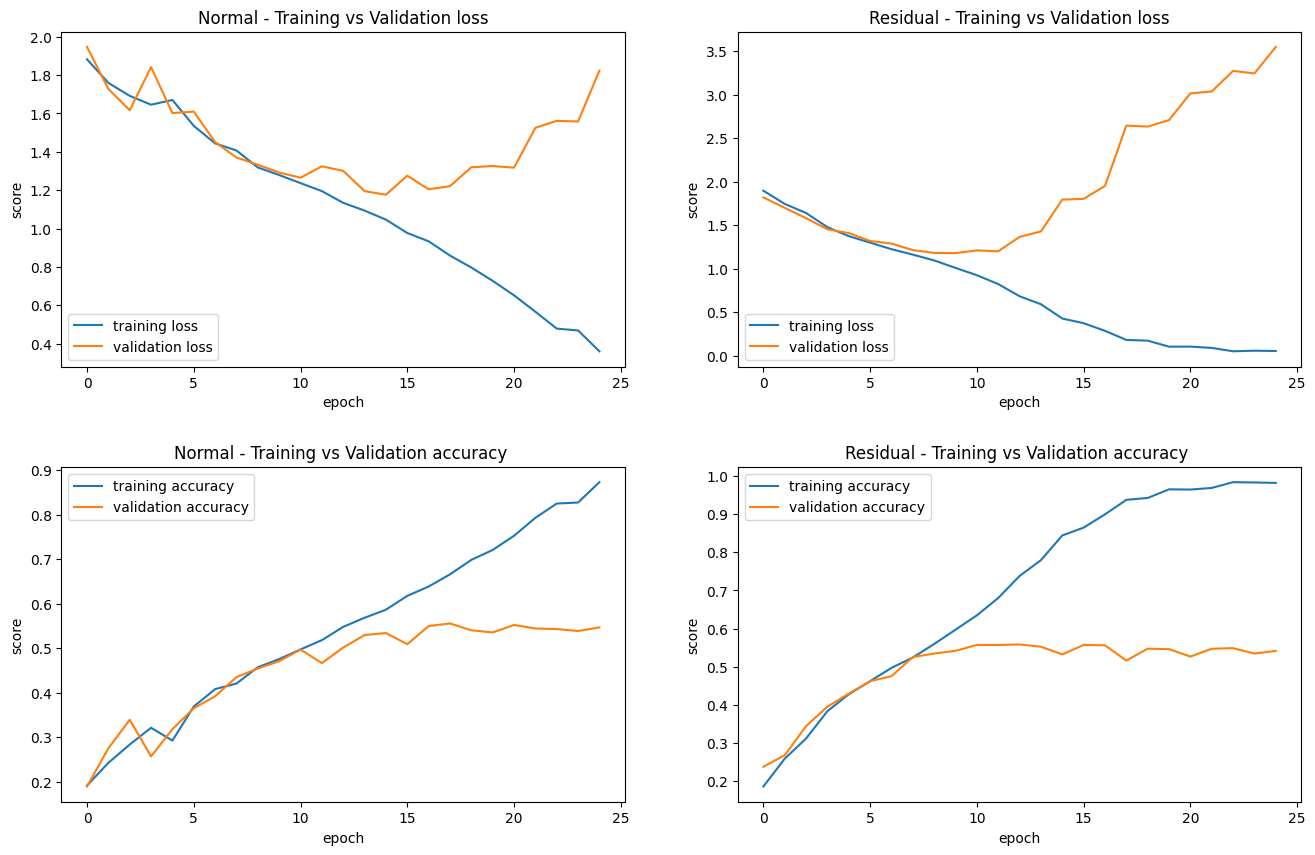

In [198]:
evaluateResults(modelTypeResultsArray, ['Normal', 'Residual'], 'ResVsNormal')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>Normal Model</h4>
            <img src="./tensorBoardImages/run1/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%; height: 100px;"> 
            <h4>Residual Model</h4>
            <img src="./tensorBoardImages/run2/bestEpoch.png" width="500"/>
    </div>
</div>

<div>
    <h3> Validation Accuracy at last Epoch</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h3>Normal Model</h3>
            <img src="./tensorBoardImages/run1/totTime.png" width="500"/>
        </div>
        <div style="margin-left: 50%; height: 100px;"> 
            <h3>Residual Model</h3>
            <img src="./tensorBoardImages/run2/totTime.png" width="500"/>
    </div>
</div>

#### Test Data Evaluation

In [80]:
# arrays to store multiple inputs for testing 
testDataArray = [testingImages, ageTestScal, sexTestEnc, labelTypeTestEnc, locationTestEnc]
testLabelsArray = testingImagesLabels

In [81]:
def resultOnTestData(model,data, targetLabel):
    '''
    function that generates classification report of a model on test data
    
    parameters: 
    model: the trained model 
    data: test data
    targetLabel: the truth values for testing data
    
    output: 
    prints classification report of a model on test data
    '''      

    predictLabels = model.predict(data)
    predictLabels = np.argmax(predictLabels, axis=1) 
    
    targetCategoricalLabels = np.argmax(targetLabel, axis=1)
    print(classification_report(targetCategoricalLabels, predictLabels))

In [82]:
for model in modelTypeArray:
    resultOnTestData( model, testDataArray, testLabelsArray)

155/155 [==============================] - 16s 101ms/step
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       740
           1       0.42      0.42      0.42       683
           2       0.37      0.36      0.37       724
           3       0.52      0.57      0.54       676
           4       0.45      0.40      0.43       674
           5       0.65      0.61      0.63       750
           6       0.85      0.90      0.87       708

    accuracy                           0.53      4955
   macro avg       0.53      0.53      0.53      4955
weighted avg       0.53      0.53      0.53      4955

155/155 [==============================] - 16s 101ms/step
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       740
           1       0.44      0.31      0.37       683
           2       0.36      0.39      0.37       724
           3       0.55      0.61      0.58       676
           4    

<div class="alert alert-block alert-success">
Model with residual connection is selected so it will be save as the best model</div>

In [215]:
# Store the best performing model
bestModelResult = modelTypeResultsArray[1]
bestModel = modelTypeArray[1]

### Experimentation

<div class="alert alert-block alert-info">
In this section we'll be experimenting with different parameters and architectures to improve the model.
We'll try experimenting with different things inlcuding:<br>
* Learning rates<br>
* Weighted l2 regularization rates<br>
* Dropout rates<br>
* Batch nomralization<br>
* ModelCheckpoint and EarlyStopping Callbacks<br>
* REDUCELRONPLATEAU Callback<br>
</div>

### Different Learning Rates

<div class="alert alert-block alert-info">
First let's start by comparing our best model which has default learning rate of 0.001 with models having different learning rates.</div>

In [94]:
# 3 Different Architectures
def residualImageModel(imageInput, l2R, drRate):
    '''
    function that passes an image input into a residual convolutional neural network to get an output. It also
    applies regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    imageInput: the image input that needs to be passed in a residual cnn
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual cnn 
    '''  
    imageBranch = Conv2D(32,(5, 5),kernel_regularizer=l2(l2R), 
                         padding='valid',activation='relu')(imageInput)
    imageBranch = Conv2D(32,(3, 3), kernel_regularizer=l2(l2R),
                         padding='valid',activation='relu')(imageBranch)
    imageBranch = Dropout(drRate/2)(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    
    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R), 
                         padding='same',activation='relu')(imageBranch)
    residualData = imageBranch
    
    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R),
                         padding='same',activation='relu')(imageBranch)
    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R),
                     padding='same',activation='relu')(imageBranch)
    
    imageBranch = layers.add([imageBranch, residualData])
    imageBranch = Dropout(drRate/2)(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    
    imageBranch = Conv2D(10,(3,3), kernel_regularizer=l2(l2R), 
                         padding='valid',activation='relu')(imageBranch)
    
    imageBranch = Flatten()(imageBranch)
    imageBranch = Dense(256, kernel_regularizer=l2(l2R), activation='relu')(imageBranch) 
    imageBranch = Dense(128, kernel_regularizer=l2(l2R), activation='relu')(imageBranch)   
    imageBranch = Dropout(drRate)(imageBranch)
    
    return imageBranch  

In [95]:
def residualMetaModel1(metaDetaInput, l2R, drRate):
    '''
    function that passes an metadeta into smaller residual feed-forward network get an output. It also
    applies regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaInput)
    residualData = metaDetaBranch
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    metaDetaBranch = Dense(16, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    return metaDetaBranch

def residualMetaModel2(metaDetaInput, l2R, drRate):
    '''
    function that passes an metadeta into slightly bigger residual feed-forward network get an output. It also
    applies regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(64, kernel_regularizer=l2(l2R), activation='relu')(metaDetaInput)
    residualData = metaDetaBranch
    metaDetaBranch = Dense(64, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    return metaDetaBranch

In [96]:
def concatModel(imgBranch, metaDeta1, metaDeta2, metaDeta3, metaDeta4, l2R, drRate):
    '''
    function that concatenates 5 different branches by assigning them weightage in ratio 6:1:1:1:1. 
    Furthermore it passes the concatenated layer into dense layers and ending it with a final softmax layer.
    It also applies regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    imgBranch: output from the image branch
    metaDeta1: output from the metadeta1
    metaDeta2: output from the metadeta2
    metaDeta3: output from the metadeta3
    metaDeta4: output from the metadeta4
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of feed-forward network
    '''  
    
    # initialize weightage for different branches      
    imageBranchWeight = 0.6
    metaDetaBranchWeight = 0.1

    # assigning different weightage to each branch
    imgBranch = imgBranch * imageBranchWeight
    metaDeta1 = metaDeta1 * metaDetaBranchWeight
    metaDeta2 = metaDeta2 * metaDetaBranchWeight
    metaDeta3 = metaDeta3 * metaDetaBranchWeight
    metaDeta4 = metaDeta4 * metaDetaBranchWeight
    
    # concatenate multiple inputs    
    concatBranch = Concatenate()([imgBranch,metaDeta1, metaDeta2, metaDeta3, metaDeta4])

    concatBranch = Dense(256, kernel_regularizer=l2(l2R), activation='relu')(concatBranch)
    concatBranch = Dropout(drRate)(concatBranch)
    concatBranch = Dense(128, kernel_regularizer=l2(l2R), activation='relu')(concatBranch)
    concatBranch = Dropout(drRate)(concatBranch)

    concatBranch = Dense(7, activation='softmax')(concatBranch)
    return concatBranch

In [97]:
def trainValidate(model, trainD, trainL,valD,valL, logDir,epochesN):
    '''
    function that trains the model over several epoches. It uses tesnsorboard call back as well
    
    parameters: 
    model: model to be trained
    trainD: training data
    trainL: training label
    valD: validation data
    valL: validation label
    logDir: directory name to store tensorboard data
    epochesN: number of epoches to train on
    
    output: 
    model: the trained model
    modelHist: trained model's performance
    '''  
    os.makedirs(logDir, exist_ok=True)  
    callbacks = [
    TensorBoard(
        log_dir=logDir,
        histogram_freq=1,
        embeddings_freq=1,
) ]
    
    modelHist = model.fit(trainD, trainL, validation_data=(valD,valL), batch_size=128,
                    epochs= epochesN, callbacks = callbacks)
    return modelHist, model

In [98]:
def biggerModelFunc(alltrainD, allValD, logDir, learnRate = 0.001, l2RRate = 0,
                    drRate = 0, epochesNum = 10): 
    '''
    a neural network function that has multi input single output capability. It includes multiple models such
    as convolutional nerural network and feed-forward networks for different inputs. Furthermore it uses
    callbacks such as tensorboard. It also applies regularization such as Weighted L2 regularization and 
    Dropout.
    
    parameters: 
    alltrainD: array containg training data and labels
    allValD: array containg validation data and labels
    logDir: directory name to store tensorboard data
    learnRate: learning rate for the model
    l2RRate: the weighted l2 regularization rate
    drRate: dropout rate
    epochesNum (optional): number of epoches to train on
    
    output: 
    biggerModel: the trained model
    biggerModelHist: trained model's performance
    '''          
    HAM10000ImageInput = Input(shape= (85, 64, 3), name='imageInput') 
    
        
    HAM10000ImageBranch = residualImageModel(HAM10000ImageInput, l2RRate, drRate)

    

    HAM10000MetaDetaInputShape = (1,) 

    ageInput = Input(shape=HAM10000MetaDetaInputShape, name='ageInput')
    ageBranch = residualMetaModel1(ageInput, l2RRate, drRate)


    sexInput = Input(shape=HAM10000MetaDetaInputShape, name='sexInput')
    sexBranch = residualMetaModel1(sexInput, l2RRate, drRate)

    labelTypeInput = Input(shape=HAM10000MetaDetaInputShape, name='labelTypeInput')
    labelTypeBranch = residualMetaModel2(labelTypeInput, l2RRate, drRate)

    locationInput = Input(shape=HAM10000MetaDetaInputShape, name='locationInput')
    locationBranch = residualMetaModel2(locationInput, l2RRate, drRate)


    # combine the metadata output
    combinedPredictionBranch =  concatModel(HAM10000ImageBranch, ageBranch, sexBranch, labelTypeBranch, 
                                     locationBranch, l2RRate, drRate)
    


    biggerModel = Model(inputs=[HAM10000ImageInput, ageInput, sexInput, labelTypeInput, locationInput],
                           outputs=combinedPredictionBranch)

    biggerModel.compile(optimizer=Adam(learning_rate=learnRate), 
                           loss='categorical_crossentropy', metrics=['accuracy'])
    
    biggerModelHist, biggerModel = trainValidate(biggerModel, alltrainD[0], alltrainD[1],allValD[0],
                                                 allValD[1], logDir, epochesNum)
    
    return biggerModelHist, biggerModel

In [99]:
# array to store different model results
learningRatesResultsArray = []
# array to store different models
learningRatesArray = []
# array to store different learning rates
learningRates = [0.01, 0.1]
# directory name to store tensorboard data
logCount = 2

# dropout rate
dropoutRate = 0
# weighted l2 regularization rate
l2Rate = 0

# no. of iteration model is trained
NoOfepochs = 25
# store each model
eachModelType = None
# store each model result
eachModelTypeHist = None
# array to store train data and labels
allTrainData = [trainingData, trainingLabels]
# array to store val data and labels
allValData = [validationData, validationLabels]

# loop over each learning rate and train model on it
for i in range(len(learningRates)):
    log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
    # function call to get trained model and trained model result    
    eachModelTypeHist, eachModelType = biggerModelFunc(allTrainData, allValData, log_dir,
                                  learningRates[i], l2Rate, dropoutRate , NoOfepochs)
    # add each model result for for current learning rate in array    
    learningRatesResultsArray.append(eachModelTypeHist)
    # add each model in array
    learningRatesArray.append(eachModelType)
    logCount = logCount+1

Epoch 1/25
88/88 [==============================] - 153s 2s/step - loss: 1.9724 - accuracy: 0.1477 - val_loss: 1.9453 - val_accuracy: 0.1515
Epoch 2/25
88/88 [==============================] - 143s 2s/step - loss: 1.9460 - accuracy: 0.1462 - val_loss: 1.9454 - val_accuracy: 0.1515
Epoch 3/25
88/88 [==============================] - 141s 2s/step - loss: 1.9457 - accuracy: 0.1481 - val_loss: 1.9453 - val_accuracy: 0.1515
Epoch 4/25
88/88 [==============================] - 142s 2s/step - loss: 1.9456 - accuracy: 0.1521 - val_loss: 1.9454 - val_accuracy: 0.1494
Epoch 5/25
88/88 [==============================] - 141s 2s/step - loss: 1.9457 - accuracy: 0.1521 - val_loss: 1.9456 - val_accuracy: 0.1515
Epoch 6/25
88/88 [==============================] - 141s 2s/step - loss: 1.9458 - accuracy: 0.1445 - val_loss: 1.9451 - val_accuracy: 0.1494
Epoch 7/25
88/88 [==============================] - 154s 2s/step - loss: 1.9457 - accuracy: 0.1469 - val_loss: 1.9453 - val_accuracy: 0.1515
Epoch 8/25
88

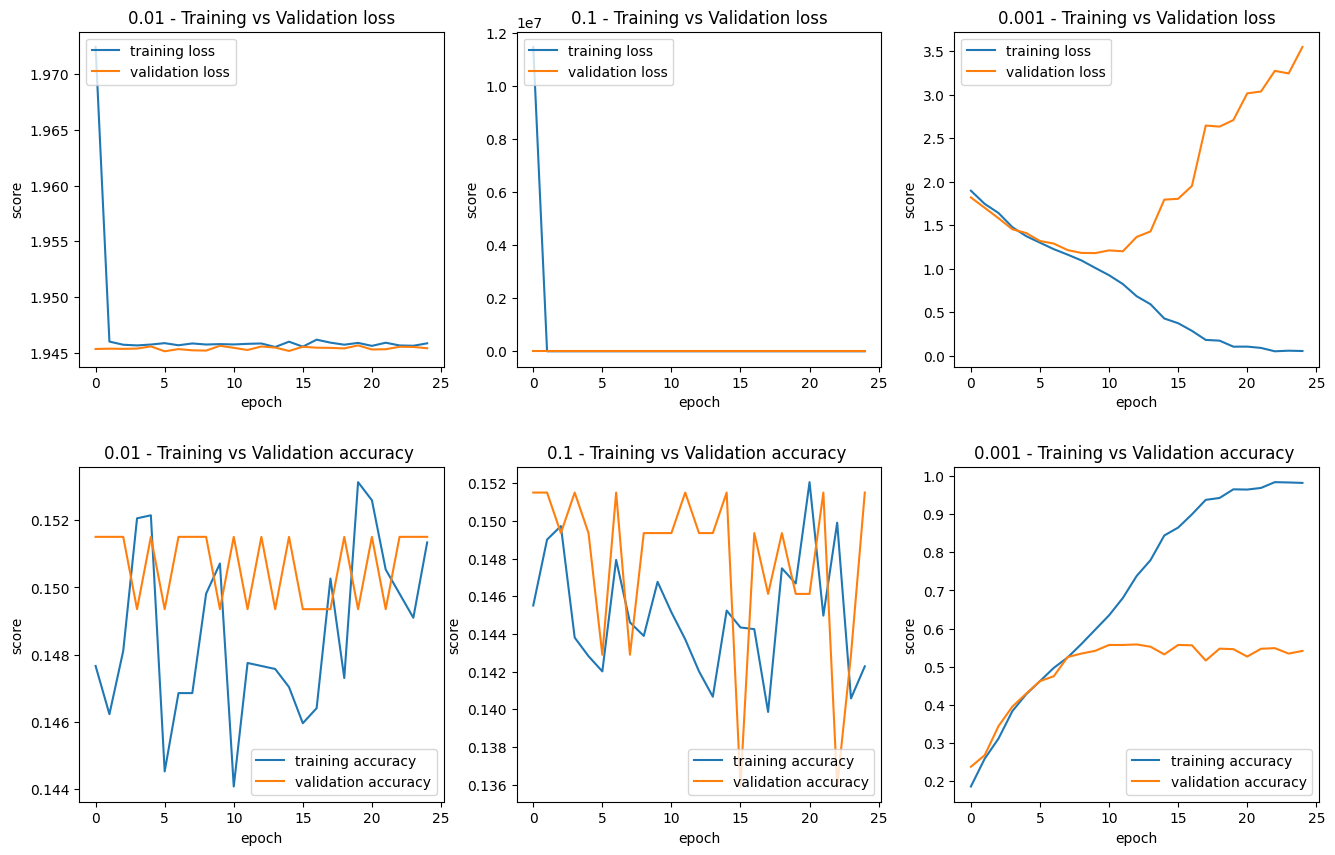

In [216]:
evaluateResults(learningRatesResultsArray, ['0.01', '0.1'], 'learnRateComparision',bestModelResult,'0.001',
                lossLegendPos = 'upper left', accLegendPos = 'lower right')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>0.01 Model</h4>
            <img src="./tensorBoardImages/run3/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>0.1 Model</h4>
            <img src="./tensorBoardImages/run4/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

<div> 
    <h4>0.001 Model</h4>
    <img src="./tensorBoardImages/run2/bestEpoch.png" width="500"/>
</div>

In [139]:
for model in learningRatesArray:
    resultOnTestData( model, testDataArray, testLabelsArray)

155/155 [==============================] - 14s 91ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       740
           1       0.00      0.00      0.00       683
           2       0.00      0.00      0.00       724
           3       0.00      0.00      0.00       676
           4       0.00      0.00      0.00       674
           5       0.15      1.00      0.26       750
           6       0.00      0.00      0.00       708

    accuracy                           0.15      4955
   macro avg       0.02      0.14      0.04      4955
weighted avg       0.02      0.15      0.04      4955

155/155 [==============================] - 15s 97ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       740
           1       0.00      0.00      0.00       683
           2       0.00      0.00      0.00       724
           3       0.00      0.00      0.00       676
           4      

<div class="alert alert-block alert-success">
The best model from last section with learning rate 0.0001 is selected to continue</div>

### Adding L2 Regularization

<div class="alert alert-block alert-info">
To overcome overfitting lets experiment with different weighted l2 regularized models</div>

In [143]:
# array to store different models
l2RatesResultsArray = []
# array to store different models
l2RatesArray = []
# array to store different l2 regularization rates
l2Rates = [0.0001, 0.001]
# learning rate for model
learningRate = 0.001
# dropout rate for the model
dropoutRate = 0
# directory name to store tensorboard data
logCount = 4
# no. of iteration model is trained
NoOfepochs = 25
# store each model
eachModel = None
# store each model result
eachModelType = None

# loop over each learning rate and train model on it
for i in range(len(l2Rates)):
    log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
    # function call to get trained model and trained model result    
    eachModelTypeHist, eachModelType = biggerModelFunc(allTrainData, allValData, log_dir, 
                                  learningRate, l2Rates[i], dropoutRate, NoOfepochs)
    # add each model result for for current l2 regularization rate in array    
    l2RatesResultsArray.append(eachModelTypeHist)
    # store each model result
    l2RatesArray.append(eachModelType)
    logCount = logCount+1

Epoch 1/25
88/88 [==============================] - 147s 2s/step - loss: 1.9022 - accuracy: 0.2215 - val_loss: 1.7745 - val_accuracy: 0.2578
Epoch 2/25
88/88 [==============================] - 144s 2s/step - loss: 1.7357 - accuracy: 0.2753 - val_loss: 1.6736 - val_accuracy: 0.3017
Epoch 3/25
88/88 [==============================] - 144s 2s/step - loss: 1.5767 - accuracy: 0.3659 - val_loss: 1.5412 - val_accuracy: 0.3668
Epoch 4/25
88/88 [==============================] - 142s 2s/step - loss: 1.4608 - accuracy: 0.4102 - val_loss: 1.5353 - val_accuracy: 0.3800
Epoch 5/25
88/88 [==============================] - 148s 2s/step - loss: 1.3872 - accuracy: 0.4536 - val_loss: 1.4171 - val_accuracy: 0.4483
Epoch 6/25
88/88 [==============================] - 142s 2s/step - loss: 1.3196 - accuracy: 0.4730 - val_loss: 1.3163 - val_accuracy: 0.4868
Epoch 7/25
88/88 [==============================] - 143s 2s/step - loss: 1.2410 - accuracy: 0.5139 - val_loss: 1.3115 - val_accuracy: 0.4801
Epoch 8/25
88

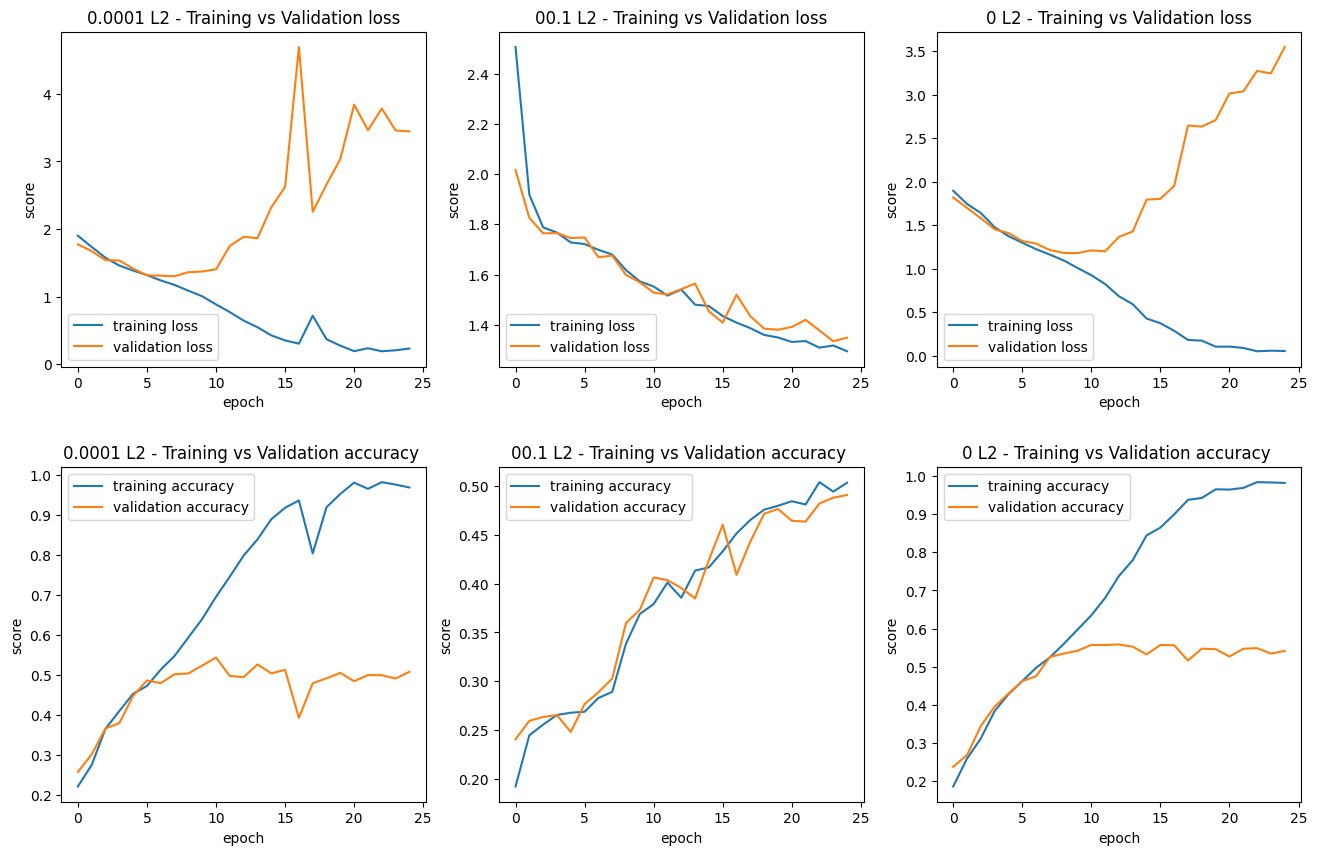

In [202]:
evaluateResults(l2RatesResultsArray,['0.0001 L2', '00.1 L2'],'l2Comparision',bestModelResult,'0 L2')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>0.0001 L2 Model</h4>
            <img src="./tensorBoardImages/run5/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>0.01 L2 Model</h4>
            <img src="./tensorBoardImages/run6/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

<div> 
    <h4>0 L2 Model</h4>
    <img src="./tensorBoardImages/run2/bestEpoch.png" width="500"/>
</div>

In [147]:
resultOnTestData( bestModel, testDataArray, testLabelsArray)

155/155 [==============================] - 17s 108ms/step
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       740
           1       0.44      0.31      0.37       683
           2       0.36      0.39      0.37       724
           3       0.55      0.61      0.58       676
           4       0.44      0.46      0.45       674
           5       0.55      0.66      0.60       750
           6       0.81      0.92      0.86       708

    accuracy                           0.53      4955
   macro avg       0.52      0.53      0.52      4955
weighted avg       0.52      0.53      0.52      4955



In [146]:
for model in l2RatesArray:
    resultOnTestData( model, testDataArray, testLabelsArray)

155/155 [==============================] - 14s 89ms/step
              precision    recall  f1-score   support

           0       0.42      0.41      0.42       740
           1       0.32      0.39      0.35       683
           2       0.39      0.32      0.35       724
           3       0.48      0.58      0.53       676
           4       0.48      0.33      0.39       674
           5       0.61      0.63      0.62       750
           6       0.82      0.87      0.84       708

    accuracy                           0.51      4955
   macro avg       0.50      0.51      0.50      4955
weighted avg       0.50      0.51      0.50      4955

155/155 [==============================] - 15s 95ms/step
              precision    recall  f1-score   support

           0       0.33      0.56      0.42       740
           1       0.35      0.43      0.39       683
           2       0.41      0.43      0.42       724
           3       0.40      0.08      0.13       676
           4      

<div class="alert alert-block alert-success">
The best model from last section with leanring rate 0.0001 is selected to continue</div>

### Adding Dropout 

<div class="alert alert-block alert-info">
Now let's experiment with different dropout rates
</div>

In [161]:
# array to store of different models
dropOutRatesResultsArray = []
# array to store differe models
dropOutRatesRatesArray = []
# array to store different dropout rates
dropOutRates = [0.25, 0.5]
# learning rate for model
learnRate = 0.0001
# weighted l2 regularization rate
l2RRate = 0
# directory name to store tensorboard data
logCount = 6
# no. of iteration model is trained
epochesNum = 25
# store each model
eachModel = None
# store each model result
eachModelType = None

# loop over each learning rate and train model on it
for i in range(len(dropOutRates)):
    log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
    # function call to get trained model and trained model result    
    eachModelTypeHist, eachModelType = biggerModelFunc(allTrainData, allValData, log_dir,
                                                       learnRate , l2RRate, dropOutRates[i],
                                                       epochesNum)
    # add each model result for for current dropout rate in array    
    dropOutRatesResultsArray.append(eachModelTypeHist)
    # add each model in array
    dropOutRatesRatesArray.append(eachModelType)
    logCount = logCount + 1

Epoch 1/25
88/88 [==============================] - 166s 2s/step - loss: 1.9429 - accuracy: 0.1635 - val_loss: 1.9196 - val_accuracy: 0.1959
Epoch 2/25
88/88 [==============================] - 157s 2s/step - loss: 1.8608 - accuracy: 0.2276 - val_loss: 1.8070 - val_accuracy: 0.2500
Epoch 3/25
88/88 [==============================] - 159s 2s/step - loss: 1.7749 - accuracy: 0.2503 - val_loss: 1.8231 - val_accuracy: 0.2169
Epoch 4/25
88/88 [==============================] - 158s 2s/step - loss: 1.7292 - accuracy: 0.2679 - val_loss: 1.6816 - val_accuracy: 0.3305
Epoch 5/25
88/88 [==============================] - 157s 2s/step - loss: 1.6617 - accuracy: 0.3222 - val_loss: 1.5943 - val_accuracy: 0.3811
Epoch 6/25
88/88 [==============================] - 157s 2s/step - loss: 1.5597 - accuracy: 0.3806 - val_loss: 1.4783 - val_accuracy: 0.4316
Epoch 7/25
88/88 [==============================] - 157s 2s/step - loss: 1.4569 - accuracy: 0.4224 - val_loss: 1.4362 - val_accuracy: 0.4486
Epoch 8/25
88

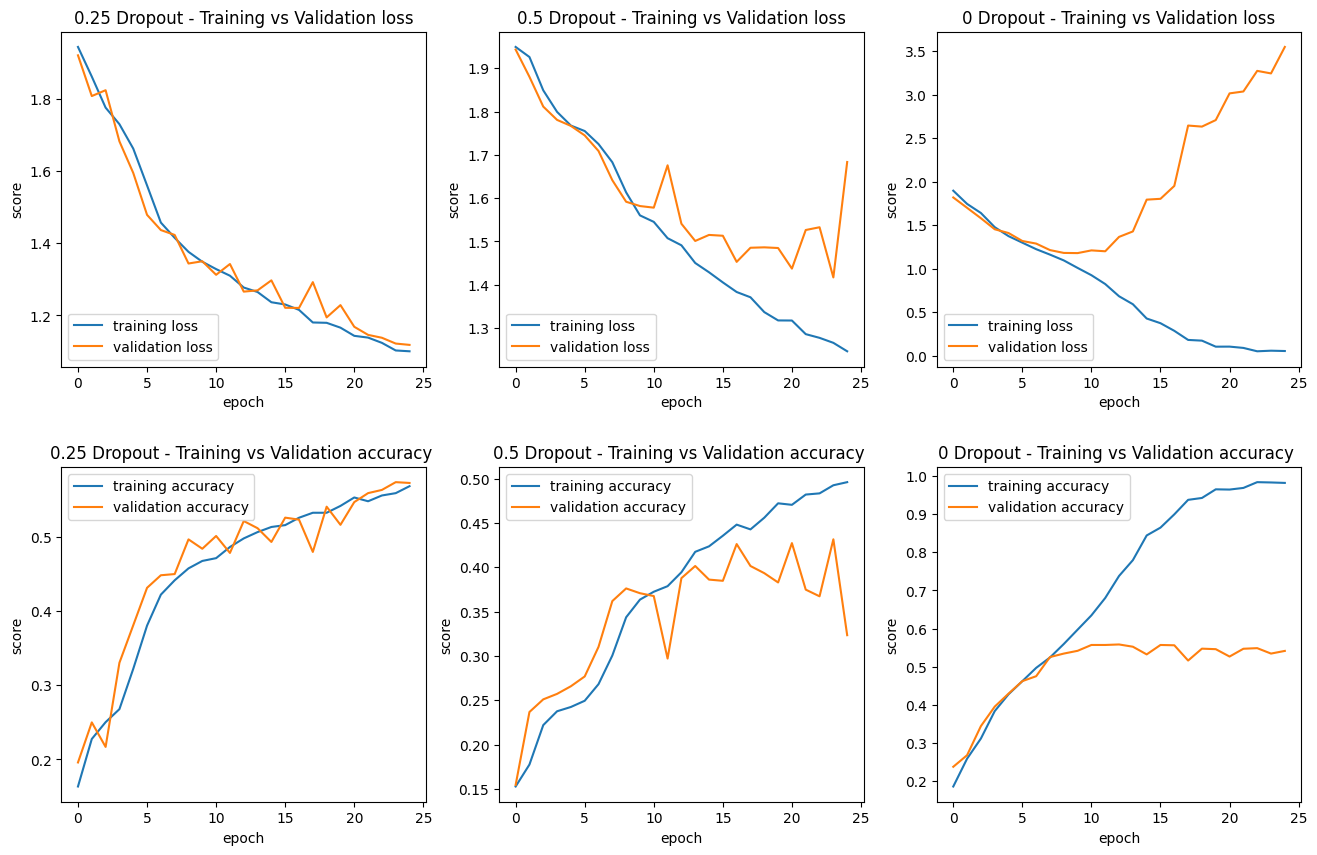

In [203]:
evaluateResults(dropOutRatesResultsArray, ['0.25 Dropout', '0.5 Dropout'], 'dropoutComparision',
                bestModelResult,'0 Dropout')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>0.25 Dropout Model</h4>
            <img src="./tensorBoardImages/run7/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>0.5 Dropout Model</h4>
            <img src="./tensorBoardImages/run8/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

<div> 
    <h4>0 Dropout Model</h4>
    <img src="./tensorBoardImages/run2/bestEpoch.png" width="500"/>
</div>

In [163]:
for model in dropOutRatesRatesArray:
    resultOnTestData( model, testDataArray, testLabelsArray)

155/155 [==============================] - 16s 101ms/step
              precision    recall  f1-score   support

           0       0.49      0.56      0.53       740
           1       0.44      0.49      0.47       683
           2       0.45      0.52      0.48       724
           3       0.55      0.25      0.34       676
           4       0.50      0.54      0.52       674
           5       0.70      0.61      0.65       750
           6       0.83      0.96      0.89       708

    accuracy                           0.57      4955
   macro avg       0.57      0.56      0.55      4955
weighted avg       0.57      0.57      0.56      4955

155/155 [==============================] - 16s 97ms/step
              precision    recall  f1-score   support

           0       0.26      0.03      0.05       740
           1       0.30      0.04      0.06       683
           2       0.12      0.30      0.17       724
           3       0.50      0.00      0.01       676
           4     

<div class="alert alert-block alert-success">
Model with dropoutrate 0.25 is selected so it will be saved as the best model</div>

In [204]:
bestModelResult = dropOutRatesResultsArray[0]
bestModel = dropOutRatesRatesArray[0]

### Adding Batch Normalization 

<div class="alert alert-block alert-info">
Now lets experiment by adding batch normalization layers and comapring it with the best model
</div>

In [229]:
# 3 Different Architectures
def residualImageModel(imageInput, l2R, drRate):
    '''
    function that passes an image input into a residual convolutional neural network to get an output. It also
    applies batch normalization, regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    imageInput: the image input that needs to be passed in a residual cnn
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual cnn 
    '''  
    imageBranch = Conv2D(32,(5, 5),kernel_regularizer=l2(l2R), 
                         padding='valid',activation='relu')(imageInput)
    imageBranch = BatchNormalization()(imageBranch)  
    imageBranch = Conv2D(32,(3, 3), kernel_regularizer=l2(l2R),
                         padding='valid',activation='relu')(imageBranch)
    imageBranch = Dropout(drRate/2)(imageBranch)
    imageBranch = BatchNormalization()(imageBranch)  
    imageBranch = MaxPool2D((2,2))(imageBranch)
    
    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R), 
                         padding='same',activation='relu')(imageBranch)
    imageBranch = BatchNormalization()(imageBranch)  
    residualData = imageBranch
    
    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R),
                         padding='same',activation='relu')(imageBranch)
    imageBranch = BatchNormalization()(imageBranch)  

    imageBranch = Conv2D(24,(3,3), kernel_regularizer=l2(l2R),
                     padding='same',activation='relu')(imageBranch)
    imageBranch = BatchNormalization()(imageBranch)  

    imageBranch = layers.add([imageBranch, residualData])
    imageBranch = Dropout(drRate/2)(imageBranch)
    imageBranch = MaxPool2D((2,2))(imageBranch)
    
    imageBranch = Conv2D(10,(3,3), kernel_regularizer=l2(l2R), 
                         padding='valid',activation='relu')(imageBranch)
    imageBranch = BatchNormalization()(imageBranch) 
    imageBranch = Flatten()(imageBranch)
    imageBranch = Dense(256, kernel_regularizer=l2(l2R), activation='relu')(imageBranch) 
    imageBranch = Dense(128, kernel_regularizer=l2(l2R), activation='relu')(imageBranch) 
    imageBranch = BatchNormalization()(imageBranch)  
    imageBranch = Dropout(drRate)(imageBranch)
    
    return imageBranch  

In [230]:
def residualMetaModel1(metaDetaInput, l2R, drRate):
    '''
    function that passes a metadeta into smaller residual feed-forward network get an output. It also
    applies batch Normalization, and regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaInput)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    residualData = metaDetaBranch
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    metaDetaBranch = Dense(16, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    return metaDetaBranch

def residualMetaModel2(metaDetaInput, l2R, drRate):
    '''
    function that passes a metadeta into slightly bigger residual feed-forward network get an output. It also
    applies batch Normalization, and regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    metaDetaInput: the metadeta input that needs to be passed in a residual feed-forward network
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of residual feed-forward network
    ''' 
    metaDetaBranch = Dense(64, kernel_regularizer=l2(l2R), activation='relu')(metaDetaInput)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    residualData = metaDetaBranch
    metaDetaBranch = Dense(64, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    metaDetaBranch = layers.add([metaDetaBranch, residualData])
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    metaDetaBranch = Dense(32, kernel_regularizer=l2(l2R), activation='relu')(metaDetaBranch)
    metaDetaBranch = BatchNormalization()(metaDetaBranch)  
    metaDetaBranch = Dropout(drRate)(metaDetaBranch)
    return metaDetaBranch

def concatModel(imgBranch, metaDeta1, metaDeta2, metaDeta3, metaDeta4, l2R, drRate):
    '''
    function that concatenates 5 different branches by assigning them weightage in ratio 6:1:1:1:1. 
    Furthermore it passes the concatenated layer into dense layers and ending it with a final softmax layer.
    It also applies batch normalization and regularization such as Weighted L2 regularization and Dropout
    
    parameters: 
    imgBranch: output from the image branch
    metaDeta1: output from the metadeta1
    metaDeta2: output from the metadeta2
    metaDeta3: output from the metadeta3
    metaDeta4: output from the metadeta4
    l2R: The weighted l2 regularization rate
    drRate: dropout rate
    
    output: returns the ouput of feed-forward network
    '''  
    
    # Initialize weightage for different branches      
    imageBranchWeight = 0.6
    metaDetaBranchWeight = 0.1

    # assigning different weightage to each branch
    imgBranch = imgBranch * imageBranchWeight
    metaDeta1 = metaDeta1 * metaDetaBranchWeight
    metaDeta2 = metaDeta2 * metaDetaBranchWeight
    metaDeta3 = metaDeta3 * metaDetaBranchWeight
    metaDeta4 = metaDeta4 * metaDetaBranchWeight
    
    # concatenate multiple inputs    
    concatBranch = Concatenate()([imgBranch,metaDeta1, metaDeta2, metaDeta3, metaDeta4])

    concatBranch = Dense(256, kernel_regularizer=l2(l2R), activation='relu')(concatBranch)
    concatBranch = BatchNormalization()(concatBranch)  
    concatBranch = Dropout(drRate)(concatBranch)
    concatBranch = Dense(128, kernel_regularizer=l2(l2R), activation='relu')(concatBranch)
    concatBranch = BatchNormalization()(concatBranch)  
    concatBranch = Dropout(drRate)(concatBranch)

    concatBranch = Dense(7, activation='softmax')(concatBranch)
    return concatBranch

In [166]:
# array to store batch normalization model results
batchNormalizationHist = []
# array to store batch normalization model
batchNormalizationModel = []

# dropout rate
drRate = 0.25
# learning rate for model
learnRate = 0.0001
# l2 regularization rate
l2RRate = 0
# directory name to store tensorboard data
logCount = 8
# no of iterations model will train for
epochesNum = 25

log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
# function call to get trained model and trained model result    
batchNormalizationHist, batchNormalizationModel = biggerModelFunc(allTrainData, allValData, log_dir,
                                                   learnRate , l2RRate, drRate,
                                                   epochesNum)
logCount = logCount + 1

Epoch 1/25
88/88 [==============================] - 178s 2s/step - loss: 1.9410 - accuracy: 0.1542 - val_loss: 1.9181 - val_accuracy: 0.2096
Epoch 2/25
88/88 [==============================] - 164s 2s/step - loss: 1.8526 - accuracy: 0.2197 - val_loss: 1.7783 - val_accuracy: 0.2441
Epoch 3/25
88/88 [==============================] - 161s 2s/step - loss: 1.7589 - accuracy: 0.2492 - val_loss: 1.7296 - val_accuracy: 0.2578
Epoch 4/25
88/88 [==============================] - 160s 2s/step - loss: 1.7334 - accuracy: 0.2672 - val_loss: 1.7228 - val_accuracy: 0.2855
Epoch 5/25
88/88 [==============================] - 164s 2s/step - loss: 1.6948 - accuracy: 0.2921 - val_loss: 1.6393 - val_accuracy: 0.3046
Epoch 6/25
88/88 [==============================] - 161s 2s/step - loss: 1.6474 - accuracy: 0.3275 - val_loss: 1.5884 - val_accuracy: 0.3735
Epoch 7/25
88/88 [==============================] - 157s 2s/step - loss: 1.6014 - accuracy: 0.3551 - val_loss: 1.5792 - val_accuracy: 0.3628
Epoch 8/25
88

In [167]:
BatchvsNormalResultsArray = [batchNormalizationHist, bestModelResult]

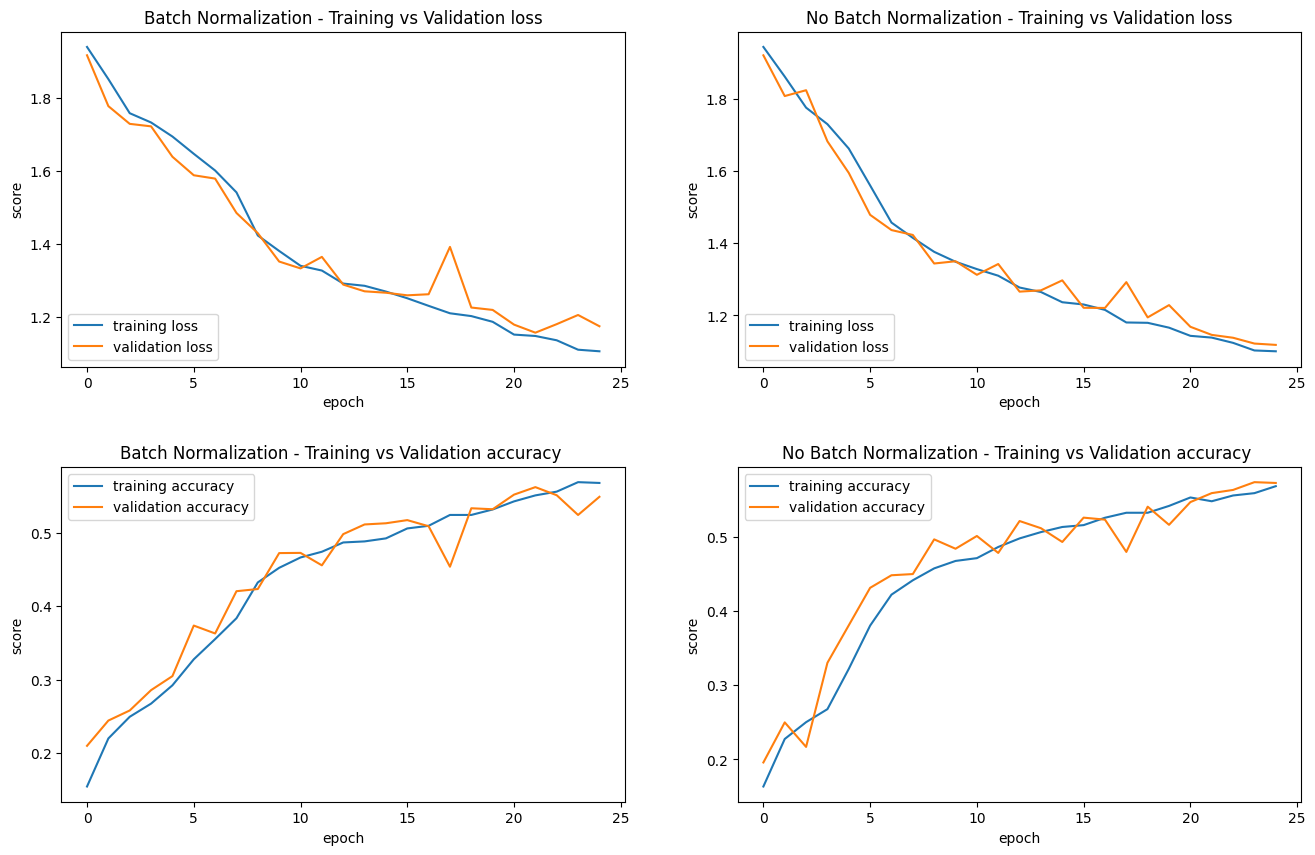

In [205]:
evaluateResults(BatchvsNormalResultsArray, ['Batch Normalization', 'No Batch Normalization'], 
                'BatchNormComparision')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>without Batch Normalization  Model</h4>
            <img src="./tensorBoardImages/run7/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>Batch Normalization Model</h4>
            <img src="./tensorBoardImages/run9/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

In [171]:
resultOnTestData( batchNormalizationModel, testDataArray, testLabelsArray)

155/155 [==============================] - 13s 82ms/step
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       740
           1       0.51      0.36      0.42       683
           2       0.34      0.56      0.42       724
           3       0.56      0.27      0.37       676
           4       0.46      0.60      0.52       674
           5       0.72      0.57      0.63       750
           6       0.87      0.89      0.88       708

    accuracy                           0.54      4955
   macro avg       0.56      0.53      0.53      4955
weighted avg       0.56      0.54      0.53      4955



In [170]:
resultOnTestData( bestModel, testDataArray, testLabelsArray)

155/155 [==============================] - 13s 81ms/step
              precision    recall  f1-score   support

           0       0.49      0.56      0.53       740
           1       0.44      0.49      0.47       683
           2       0.45      0.52      0.48       724
           3       0.55      0.25      0.34       676
           4       0.50      0.54      0.52       674
           5       0.70      0.61      0.65       750
           6       0.83      0.96      0.89       708

    accuracy                           0.57      4955
   macro avg       0.57      0.56      0.55      4955
weighted avg       0.57      0.57      0.56      4955



<div class="alert alert-block alert-success">
Model with batch normalization is selected so it will be saved as the best model</div>

In [206]:
bestModelResult = batchNormalizationHist
bestModel = batchNormalizationModel

### Early Stopping and Model Checkpoint Callbacks

<div class="alert alert-block alert-info">
Now lets add early stopping and model checkpint callbacks and compare it to our best model</div>

In [172]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [176]:
def trainValidate(model, trainD, trainL,valD,valL, logDir,epochesN):
    '''
    function that trains the model over several epoches. It uses tesnsorboard, Early Stopping
    and Model Checkpoint call back as well.
    
    parameters: 
    model: model to be trained
    trainD: training data
    trainL: training label
    valD: validation data
    valL: validation label
    logDir: directory name to store tensorboard data
    epochesN: number of epoches to train on
    
    output: 
    model: the trained model
    modelHist: trained model's performance
    '''  
    os.makedirs(logDir, exist_ok=True)  
    callbacks = [
    TensorBoard(
        log_dir=logDir,
        histogram_freq=1,
        embeddings_freq=1,
    ),
    EarlyStopping(
    monitor='val_accuracy',
    patience=4,
    ),
    ModelCheckpoint(
        filepath='early_stopping_model.h5',
        monitor='val_loss',
        save_best_only=True,
    )]
    
    modelHist = model.fit(trainD, trainL, validation_data=(valD,valL), batch_size=128,
                    epochs= epochesN, callbacks = callbacks)
    return modelHist, model


In [177]:
# array to store earlyStopping model results
earlyStoppingHist = []
# array to store earlyStopping  model 
earlyStoppingModel = []

# dropout rate
drRate = 0.25
# learning rate for model
learnRate = 0.0001
# l2 regularization rate
l2RRate = 0
# directory name to store tensorboard data
logCount = 9
# no of iterations model will train for
epochesNum = 40

log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
# function call to get trained model and trained model result    
earlyStoppingHist, earlyStoppingModel = biggerModelFunc(allTrainData, allValData, log_dir,
                                                   learnRate , l2RRate, drRate,
                                                   epochesNum)

Epoch 1/40
88/88 [==============================] - 146s 2s/step - loss: 1.9277 - accuracy: 0.1803 - val_loss: 1.8603 - val_accuracy: 0.2236
Epoch 2/40
88/88 [==============================] - 139s 2s/step - loss: 1.8360 - accuracy: 0.2330 - val_loss: 1.7724 - val_accuracy: 0.2694
Epoch 3/40
88/88 [==============================] - 139s 2s/step - loss: 1.7733 - accuracy: 0.2581 - val_loss: 1.7310 - val_accuracy: 0.2998
Epoch 4/40
88/88 [==============================] - 139s 2s/step - loss: 1.7174 - accuracy: 0.2868 - val_loss: 1.7237 - val_accuracy: 0.2944
Epoch 5/40
88/88 [==============================] - 142s 2s/step - loss: 1.6747 - accuracy: 0.3194 - val_loss: 1.6298 - val_accuracy: 0.3609
Epoch 6/40
88/88 [==============================] - 147s 2s/step - loss: 1.5873 - accuracy: 0.3695 - val_loss: 1.4757 - val_accuracy: 0.4360
Epoch 7/40
88/88 [==============================] - 140s 2s/step - loss: 1.4733 - accuracy: 0.4191 - val_loss: 1.4371 - val_accuracy: 0.4376
Epoch 8/40
88

In [207]:
earlyStopvsNormalResultsArray = [earlyStoppingHist, bestModelResult]

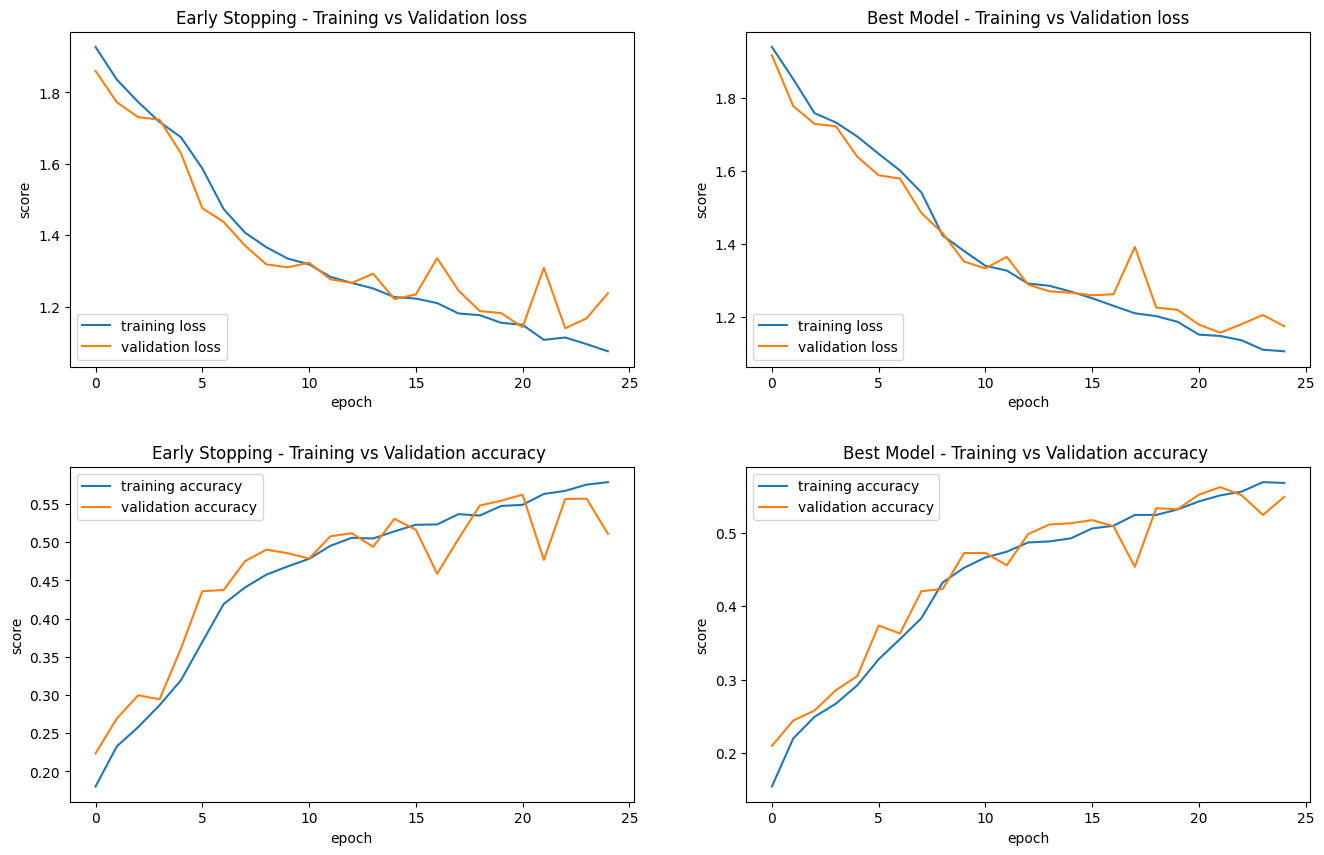

In [208]:
evaluateResults(earlyStopvsNormalResultsArray, ['Early Stopping', 'Best Model'],
               'earlyStopppingComparision')

<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>without Early Stopping Model</h4>
            <img src="./tensorBoardImages/run9/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>Early Stopping Model</h4>
            <img src="./tensorBoardImages/run10/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

In [209]:
resultOnTestData( bestModel, testDataArray, testLabelsArray)

155/155 [==============================] - 15s 98ms/step
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       740
           1       0.51      0.36      0.42       683
           2       0.34      0.56      0.42       724
           3       0.56      0.27      0.37       676
           4       0.46      0.60      0.52       674
           5       0.72      0.57      0.63       750
           6       0.87      0.89      0.88       708

    accuracy                           0.54      4955
   macro avg       0.56      0.53      0.53      4955
weighted avg       0.56      0.54      0.53      4955



In [181]:
resultOnTestData( earlyStoppingModel, testDataArray, testLabelsArray)

155/155 [==============================] - 13s 82ms/step
              precision    recall  f1-score   support

           0       0.43      0.49      0.46       740
           1       0.48      0.23      0.31       683
           2       0.31      0.65      0.42       724
           3       0.53      0.26      0.35       676
           4       0.46      0.58      0.52       674
           5       0.85      0.49      0.62       750
           6       0.92      0.82      0.87       708

    accuracy                           0.51      4955
   macro avg       0.57      0.50      0.51      4955
weighted avg       0.57      0.51      0.51      4955



<div class="alert alert-block alert-success">
This time around best model won't be replaced. We'll be using early stopping, model checkpint and reduceLROnPlateau together in next section and compare it to our best model</div>

### ReduceLROnPlateau Callback

<div class="alert alert-block alert-info">
Now lets add ReduceLROnPlateau on combination with early stopping and model checkpint and compare it to our best model</div>

In [192]:
def trainValidate(model, trainD, trainL,valD,valL, logDir,epochesN):
    '''
    function that trains the model over several epoches. It uses tesnsorboard, Early Stopping,
    Model Checkpoint and ReduceLROnPlateau as callbacks.
    
    parameters: 
    model: model to be trained
    trainD: training data
    trainL: training label
    valD: validation data
    valL: validation label
    logDir: directory name to store tensorboard data
    epochesN: number of epoches to train on
    
    output: 
    model: the trained model
    modelHist: trained model's performance
    '''  
    os.makedirs(logDir, exist_ok=True)  
    callbacks = [
    TensorBoard(
        log_dir=logDir,
        histogram_freq=1,
        embeddings_freq=1,
    ),
    EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath='early_stopping_model.h5',
        monitor='val_loss',
        save_best_only=True,
    ),
    ReduceLROnPlateau(  
        monitor='val_accuracy',
        factor=0.1,
        patience=3,
        min_lr = 0.00001
    ),
    ]
    
    modelHist = model.fit(trainD, trainL, validation_data=(valD,valL), batch_size=128,
                    epochs= epochesN, callbacks = callbacks)
    return modelHist, model

In [193]:
# array to store ReduceLROnPlateau model results
ReduceLROnPlateauHist = []
# array to store ReduceLROnPlateau model
ReduceLROnPlateauModel = []

# dropout rate
drRate = 0.25
# learning rate for model
learnRate = 0.0001
# l2 regularization rate
l2RRate = 0
# directory name to store tensorboard data
logCount = 10
# no of iterations model will train for
epochesNum = 40


log_dir = os.path.join("my_log_dir/", f"run{logCount + 1}")
# function call to get trained model and trained model result    
ReduceLROnPlateauHist, ReduceLROnPlateauModel = biggerModelFunc(allTrainData, allValData, log_dir,
                                                   learnRate , l2RRate, drRate,
                                                   epochesNum)
logCount = logCount + 1

Epoch 1/40
88/88 [==============================] - 145s 2s/step - loss: 1.9336 - accuracy: 0.1696 - val_loss: 1.8754 - val_accuracy: 0.2320 - lr: 1.0000e-04
Epoch 2/40
88/88 [==============================] - 152s 2s/step - loss: 1.8055 - accuracy: 0.2358 - val_loss: 1.7481 - val_accuracy: 0.2438 - lr: 1.0000e-04
Epoch 3/40
88/88 [==============================] - 142s 2s/step - loss: 1.7313 - accuracy: 0.2771 - val_loss: 1.6767 - val_accuracy: 0.2901 - lr: 1.0000e-04
Epoch 4/40
88/88 [==============================] - 142s 2s/step - loss: 1.6278 - accuracy: 0.3431 - val_loss: 1.5375 - val_accuracy: 0.3910 - lr: 1.0000e-04
Epoch 5/40
88/88 [==============================] - 154s 2s/step - loss: 1.5346 - accuracy: 0.3796 - val_loss: 1.4924 - val_accuracy: 0.4053 - lr: 1.0000e-04
Epoch 6/40
88/88 [==============================] - 158s 2s/step - loss: 1.4693 - accuracy: 0.4019 - val_loss: 1.4779 - val_accuracy: 0.3988 - lr: 1.0000e-04
Epoch 7/40
88/88 [==============================] - 

<div>
        <h4>without ReduceLROnPlateau Model</h4>
        <img src="./ComparisionImages/ReduceLROnPlateau CallbackvsBest.jpg"/>
    

</div>


<div>
    <h3> Highest Validation Accuracy for each Model</h3>
    <div style="width: 100%;">
        <div style="width: 50%; float: left;"> 
            <h4>without ReduceLROnPlateau Model</h4>
            <img src="./tensorBoardImages/run9/bestEpoch.png" width="500"/>
        </div>
        <div style="margin-left: 50%"> 
            <h4>ReduceLROnPlateau Model</h4>
            <img src="./tensorBoardImages/run11/bestEpoch.png" width="500"/>
        </div>
    </div>
    

</div>

In [211]:
resultOnTestData( bestModel, testDataArray, testLabelsArray)

155/155 [==============================] - 13s 84ms/step
              precision    recall  f1-score   support

           0       0.47      0.49      0.48       740
           1       0.51      0.36      0.42       683
           2       0.34      0.56      0.42       724
           3       0.56      0.27      0.37       676
           4       0.46      0.60      0.52       674
           5       0.72      0.57      0.63       750
           6       0.87      0.89      0.88       708

    accuracy                           0.54      4955
   macro avg       0.56      0.53      0.53      4955
weighted avg       0.56      0.54      0.53      4955



In [212]:
resultOnTestData( ReduceLROnPlateauModel, testDataArray, testLabelsArray)

155/155 [==============================] - 13s 81ms/step
              precision    recall  f1-score   support

           0       0.42      0.62      0.50       740
           1       0.44      0.36      0.40       683
           2       0.42      0.48      0.45       724
           3       0.43      0.29      0.35       676
           4       0.49      0.57      0.53       674
           5       0.78      0.54      0.64       750
           6       0.88      0.88      0.88       708

    accuracy                           0.54      4955
   macro avg       0.55      0.54      0.54      4955
weighted avg       0.56      0.54      0.54      4955



<div class="alert alert-block alert-success">
Model with ReduceLROnPlateauHist  selected so it will be saved as the best model</div>

In [213]:
bestModelResult = ReduceLROnPlateauHist
bestModel = ReduceLROnPlateauModel

In [228]:
# The code written by me ends here.

<div class="alert alert-block alert-success">
This marks the end of our project</div>